# Assignment 2 

## EXERCICE 1
  #### a)    Let's  formulate the revenue maximization problem :
  If we consider $x_i$ as the price of the bucket number $i$ we can write the maximization problem as follow  :
    <center>$\max_{  }J(x_1,x_2,x_3) = \sum_{n=1}^{3} x_i*D_i(x_i)  $</center>
      under the equlity constraints of the total number of seats equal to  150 :
  <center>$ g(x_1,x_2,x_3)=\sum_{n=1}^{3}D_i(x_i)-150 = 0  $<center>
   
     

  #### b)    Let's optimize our problem :
  <center>$\max_{  }J(x)   $</center>
   <center>s.t $  g(x_1,x_2,x_3)=0  $<center>
<br>
Since our problem is non linear we will use the sequential quadratic programming method (SQP) which is well suited for non lineary constrained problems . 
<br>The lagrangian of this problem is  : 
     $L(x,\lambda) = J(x)- \lambda^T*g(x)$ </br>
and the first-order optimality condition is:
$\nabla L(x,\lambda) = 0 $

Using the newton method the system of equations representing the first-order optimality conditions for the optimization problem is : <br>
<br>
<center>$ q(p) =1/2p^T*[\nabla^2xx  L(x_k,\lambda_k)]p+p^T[\nabla_xL(x_k,\lambda_k)]$<center> 
    <center> s.t $  [\nabla g(x_k)]^Tp+g(x_k)=0$<center>
  
  
  <br>
This optimization problem is a quadratic program; that is, it is the minimization of a quadratic function subjected to linear constraints.<br> The
quadratic function is a Taylor series approximation to the Lagrangian at$(x_k,λ_k)$, and the
constraints are a linear approximation to  $g(x_k+p)=0$.
     
<br> 

We used in the current application the python scipi.optimize library tool wich has a built in method SQLP 'Sequential Least SQuares Programming'  starting with an intial guess of $[500,400, 100]$
    

In [371]:


import numpy as np
import math
from scipy.optimize import minimize

a1=100
a2 = 150
a3= 300


def f(params):
    x,y,z = params
    return -100*math.exp(-1/100*x)*x - 150*math.exp(-1/150*y)*y - 300*math.exp(-1/300*z)*z

x0 = np.array([500,400, 100])


def apply_sum_constraint(params):
    x,y,z = params
    total = 150-100*math.exp(-1/100*x) - 150*math.exp(-1/150*y) - 300*math.exp(-1/300*z) #equality constraints
    return total


my_constraints = ({'type': 'eq', "fun": apply_sum_constraint })




In [372]:
res = minimize(f, x0, method='SLSQP',options={'xtol': 1e-8, 'disp': True},constraints= my_constraints)
param=100,150,300

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -43670.85883555805
            Iterations: 18
            Function evaluations: 93
            Gradient evaluations: 18


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: OptimizeWarning: Unknown solver options: xtol
  """Entry point for launching an IPython kernel.


- The solution to this problem  is $x^*=[156.74860643, 206.74899586, 356.74781447]$ which corresponds to an optimal rounded prices of $157€$ for the first bucket and $207€$ for the second bucket and $357€$ for the third bucket 

In [373]:
res

     fun: -43670.85883555805
     jac: array([11.8359375 , 14.30078125, 17.27832031])
 message: 'Optimization terminated successfully.'
    nfev: 93
     nit: 18
    njev: 18
  status: 0
 success: True
       x: array([156.74860643, 206.74899586, 356.74781447])

In [374]:
#Cheking total number of seats 
x,y,z = res.x
print ('number of seats sold with for bucket  1 is: ',round(100*math.exp(-1/100*x)),'with price',round(x),'$')
 
print ('number of seats sold with for bucket  2 is: ',round(150*math.exp(-1/150*y)) ,'with price',round(y),'$')

print ('number of seats sold with for bucket  3 is: ',round(300*math.exp(-1/300*z)),'with price',round(z),'$')

globalprice1=round(100*math.exp(-1/100*x))*x+round(150*math.exp(-1/150*y))*y+round(300*math.exp(-1/300*z))*z
print ('The global revenue is :',globalprice1)

number of seats sold with for bucket  1 is:  21 with price 157.0 $
number of seats sold with for bucket  2 is:  38 with price 207.0 $
number of seats sold with for bucket  3 is:  91 with price 357.0 $
The global revenue is : 43612.23369478468


### c) 
 #### a) 
 The global revenue should be higher if we squeeze more places but , the individual bucket price should be bit cheaper . We change the equality constraints to 153 and see the price change  

In [375]:
def apply_sum_constraint(params):
    x,y,z = params
    total = 153-100*math.exp(-1/100*x) - 150*math.exp(-1/150*y) - 300*math.exp(-1/300*z)   #equality constraints
    return total

my_constraints = ({'type': 'eq', "fun": apply_sum_constraint })

res = minimize(f, x0, method='SLSQP',options={'xtol': 1e-8 , 'disp': True},constraints= my_constraints)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -43835.26962060771
            Iterations: 18
            Function evaluations: 102
            Gradient evaluations: 18


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: OptimizeWarning: Unknown solver options: xtol
  


In [376]:
res

     fun: -43835.26962060771
     jac: array([11.46337891, 13.67285156, 16.30859375])
 message: 'Optimization terminated successfully.'
    nfev: 102
     nit: 18
    njev: 18
  status: 0
 success: True
       x: array([152.87380444, 202.87530806, 352.87413956])

  <h5>As we see bellow , we notice a global price change of 3.87$ and a global revenue increase of 480 dollars </h5>

In [377]:
old =np.array([156.74860643, 206.74899586, 356.74781447])   # old bucket prices
new=np.array([152.87380444, 202.87530806, 352.87413956])    # new prices 
pricedif=old-new
print("The price difference is: ",pricedif)

The price difference is:  [3.87480199 3.8736878  3.87367491]


In [378]:
x,y,z =res.x
100*math.exp(-1/100*x) +150*math.exp(-1/150*y) + 300*math.exp(-1/300*z)
x,y,z = res.x
print ('number of seats sold with for bucket  1 is: ',round(100*math.exp(-1/100*x)),'with price',round(x),'$')
 
print ('number of seats sold with for bucket  2 is: ',round(150*math.exp(-1/150*y)) ,'with price',round(y),'$')

print ('number of seats sold with for bucket  1 is: ',round(300*math.exp(-1/300*z)),'with price',round(z),'$')

globalprice2=round(100*math.exp(-1/100*x))*x+round(150*math.exp(-1/150*y))*y+round(300*math.exp(-1/300*z))*z
globalprice2-globalprice1

number of seats sold with for bucket  1 is:  22 with price 153.0 $
number of seats sold with for bucket  2 is:  39 with price 203.0 $
number of seats sold with for bucket  1 is:  93 with price 353.0 $


480.4219958394242

## EXERCICE 2 

### a) Let's minimize the following (Rosenbrock) function : <br>

<center>$min f(x)= 100(x_2 − x_1^2)^2+(1-x_1)^2$ <center>
<center>s.t $x_1,x_2 \in [-5,5]^2$<center>
<br>
First of all we will use the non linear conjugate gradient method and the quasi-newton BFGS method : 


In [428]:
from scipy.optimize import rosen,rosen_hess, rosen_der,fmin_cg,fmin_bfgs # we import rosen function,it'gradient and hessian 
import time 
import pandas as pd

banana_hess=rosen_hess
banana=rosen
banana_der=rosen_der


- Let's  define a fuction opti that will apply an optimisation method each run 
it's parameters are method (only fmin_cg,fmin_BFGS ) , the starting point x0 (np array), the objective function 
and the objectivefunction derivative 

In [429]:

def opti(method,x0,objfunc,objfunc_der):
    return method(objfunc, x0, fprime=objfunc_der, gtol=1e-5, full_output=1, disp=  0, retall=1) 

- Now let's define a function "run" that will run our minimisation it takes as parameters the number of runs 
the method used ( only those used in optim) , the obj. function and the obj. func derivative 
and it returns a list containing a dataframe and a list of dataframes.<br>
The first element is a df containing the starting point , ending point and the number of itterations in each run . <br>
The list contains dataframes holding obj funct evaluation/iteration for each run 

In [441]:
def run(runs,method,objfunc,objfunc_der,a,b) :
    times=[]
    start_point=[]  # starting point for each run
    end_point=[]     # ending  point for each run
    maxiter=[]   # max iteration of each run 
    J_eval=[]    # it will hold obj funct evaluations at all interm iterations
    iterhist=[] # it will hold dataframes which contains obj function evaluations for each itteration ,  
                # iterhist[0] corresponds to run 1 dataframe .... 
    d={'number of iterations':maxiter,'Starting_point':start_point,'Final_point':end_point,'runtime (sec)':times}

    # we generate N(runs) random number to start 

    #x0=runs*np.random.randn(runs, 2)
    
    x0=(b-a)* np.random.random_sample((runs, 2)) + a
    
    for j in range(runs):
        start = time.time()
        res2= opti(method,x0[j],objfunc,objfunc_der) #conjugate gradient providing function gradient
        end = time.time()
        runtime = end - start
        times.append(runtime)
        start_point.append(x0[j].tolist())
        end_point.append(res2[0].tolist())
        maxiter.append(len(res2[-1])-1)
        for i in range((len(res2[-1])-1)): J_eval.append(objfunc(res2[-1][i]))
        d1={'iteration_number':np.arange(maxiter[j]).tolist(),'obj_function':J_eval}
        df_iterhist=pd.DataFrame(d1)  # data frame holding obj funct evaluation/iteration 
        iterhist.append(df_iterhist)  # list containg all iterhist dataframes
        J_eval=[]
    df_method=pd.DataFrame(d) # data frame holding starting point , ending poit and number of itterations and runtime

    return [df_method, iterhist]   


<h5>Now let's apply run to the banana function minimization using the conjugate gradient method and 10 runs <h5>

In [442]:
resultat1=run(10,fmin_cg,banana,banana_der,-5,5)
df_CG_ban=resultat1[0]
CG_Hislist_ban=resultat1[1] #List of all iterhist dataframes in all runs 

<br> <b>Bellow a dataframe showing the starting pt and ending point for  the CG method :<b><br>

In [443]:
df_CG_ban

,number of iterations,Starting_point,Final_point,runtime (sec)
0,11,"[-4.216527308372929, 0.2810938904042102]","[0.9999999651634625, 0.9999999127788475]",0.003033
1,34,"[3.52245816436011, 0.9030305681406894]","[1.000007308363726, 1.0000146460987005]",0.003999
2,18,"[0.28101391950373067, -2.6891750390399416]","[0.999999184424358, 0.9999983651956019]",0.001965
3,14,"[-4.23860129180449, -2.596828478007338]","[1.0000000080907159, 1.0000000162252833]",0.002006
4,18,"[-4.790980801908247, 3.648611802537415]","[0.9999969777346454, 0.999993936427741]",0.002995
5,21,"[-0.018407125864598584, 2.411864687856651]","[0.9999958749218326, 0.9999917236909176]",0.002039
6,21,"[1.7565113865582553, -2.375048442775496]","[1.0000000020069375, 1.0000000040205383]",0.003214
7,28,"[4.308450571716119, -0.0670061760480154]","[1.0000000307449195, 1.0000000384759933]",0.004035
8,13,"[4.862633157267576, -4.374279876379661]","[0.999999986057627, 0.9999999720557593]",0.002001
9,14,"[-3.854454834265405, -3.9484947190414132]","[0.9999999778600922, 0.9999999556316487]",0.001984


<h5>Now let's apply run to the banana function minimization using the BFGS method and 10 runs <h5>

In [444]:
resultat2=run(10,fmin_bfgs,banana,banana_der,-5,5)
df_bfgs_ban=resultat2[0]
bfgs_Hislist_ban=resultat2[1]

<h5>Bellow a dataframe showing the starting pt and ending point for  the BFGS method :<h5>

In [445]:
df_bfgs_ban

,number of iterations,Starting_point,Final_point,runtime (sec)
0,23,"[2.3143861745410383, 3.7336039403946337]","[1.0000001252613975, 1.0000002590906971]",0.003000
1,35,"[1.8523417937936246, -0.01842590534130295]","[0.9999999092754825, 0.9999998160686822]",0.002996
2,19,"[0.8299780692027809, 1.2950446735206391]","[1.000000002804172, 1.0000000053418259]",0.002002
3,50,"[-1.3807229642459475, -2.323285351689023]","[0.9999999994856204, 0.9999999989820141]",0.006040
4,27,"[2.0280834512241475, 4.839858001764918]","[1.000000327777861, 1.0000006447467238]",0.002000
5,27,"[0.07288439401782121, 4.732211324426302]","[0.9999999972561879, 0.9999999944211717]",0.002038
6,64,"[3.949501716633261, -0.24972944302762912]","[1.0000001994273475, 1.0000004035436003]",0.008993
7,55,"[4.78323502142692, 3.04254303316365]","[1.0000000123263444, 1.0000000126002768]",0.004966
8,73,"[-3.989010509391442, -2.7478809014850003]","[1.0000000050492375, 1.000000009221483]",0.007007
9,18,"[0.7814457780929889, 1.8429687860510846]","[1.0000000001023903, 1.0000000001276876]",0.001987


<b> Now lets plot the objfunction evaluations against itteration numbers : <b>

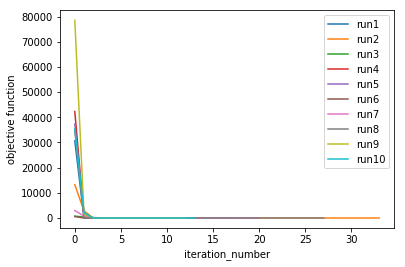

In [446]:
import matplotlib.pyplot as plt

for frame in CG_Hislist_ban:
    plt.plot(frame['iteration_number'], frame['obj_function'])
    
plt.xlabel('iteration_number')
plt.ylabel('objective function')

plt.legend(['run1','run2','run3','run4','run5','run6','run7','run8','run9','run10'], loc='upper right')    

 ### a) Let's minimize the egcrate  function : <br>

In [447]:
def egcrate(x):
       return  np.sum((x[1:]**2 + x[:-1]**2.0)+ 25*(math.sin(x[1:])**2+math.sin(x[:-1])**2 ), axis=0)

In [448]:
def egcrate_der(x):
    return np.array([np.sum(2*x[:-1]+25*math.sin(2*x[:-1])),np.sum(2*x[1:]+25*math.sin(2*x[1:]))])

In [449]:
resultat1=run(10,fmin_cg,egcrate,egcrate_der,-2*math.pi,2*math.pi)
df_CG_egc=resultat1[0]
CG_Hislist_egc=resultat1[1] #List of all iterhist dataframes in all runs

<br> <b>Bellow a dataframe showing the starting pt and ending point for  the CG method :<b><br>

In [450]:
df_CG_egc

,number of iterations,Starting_point,Final_point,runtime (sec)
0,5,"[-0.3892030828755759, 3.5297298627600604]","[9.912667260343878e-08, 3.0196017609637984]",0.001037
1,8,"[4.909131103189871, 0.9778877010437839]","[3.019601931387161, 6.526626241041525e-09]",0.000780
2,4,"[-5.40840245989612, -6.053584563819906]","[-6.031424001516337, -6.031423964319464]",0.001000
3,7,"[1.4403616351538728, -3.9506454669175355]","[-7.512366852532413e-10, -3.0196018820444905]",0.001104
4,7,"[4.234732097436005, -0.5780909563938588]","[-1.1615596302188592e-11, 4.788325053979971e-12]",0.000994
5,4,"[2.9069250556399915, -4.201809171167595]","[3.0196018863881005, -3.019601885920396]",0.000000
6,6,"[5.207356109918887, -0.058451352475483276]","[6.031424012376059, 1.0625013557378541e-10]",0.000962
7,4,"[-0.5309880349854916, -0.5309668266112473]","[-4.596087697711013e-12, -4.5943414986326665e-12]",0.000998
8,5,"[1.3829805836695117, 0.9476319912384996]","[-3.055059909546254e-13, 5.210580032121413e-14]",0.001997
9,6,"[-0.9298393453702385, -2.100608970760736]","[-7.067194295587508e-09, -3.0196018745851694]",0.001003


<h5>Now let's apply run to the banana function minimization using the BFGS method and 10 runs <h5>

In [452]:
resultat2=run(10,fmin_bfgs,egcrate,egcrate_der,-2*math.pi,2*math.pi)
df_bfgs_egc=resultat2[0]
bfgs_Hislist_egc=resultat2[1]

<br> <b>Bellow a dataframe showing the starting pt and ending point for  the BFGS method :<b><br>

In [453]:
df_bfgs_egc

,number of iterations,Starting_point,Final_point,runtime (sec)
0,5,"[3.953373489507605, 2.5658954071377735]","[3.0196018909233775, 3.019601741204051]",0.000954
1,9,"[1.4132566690064143, 3.6926005146029173]","[1.0439329730126542e-07, 3.0196019487696835]",0.001041
2,9,"[2.775509285238675, 1.4478012773223554]","[3.0196018827120215, 2.015063431143951e-08]",0.001015
3,7,"[5.601809434167679, -0.8526428397440444]","[6.031424012301511, -1.874395053893541e-09]",0.000999
4,9,"[5.577597914021492, 4.517518029320895]","[6.031423927534459, 3.0196019309501563]",0.002038
5,6,"[-0.1842128049326055, -5.967146915108889]","[7.587030441924938e-09, -6.0314239736115525]",0.001003
6,7,"[-2.2277962496124255, 3.3565654869101103]","[-3.019601703839683, 3.019601972006369]",0.000978
7,6,"[2.088749648652744, -5.212436465994967]","[3.0196018619988467, -6.031424005809182]",0.000966
8,6,"[-0.8925615419492479, -0.7510653512619161]","[2.500037745931438e-08, -3.309989944585263e-10]",0.001050
9,5,"[2.2589603272671432, -3.0304621447533258]","[3.0196018741047745, -3.019601869928152]",0.000996


<h4> we can see that the egcrate function is most of the time locked in a local minima <h4>

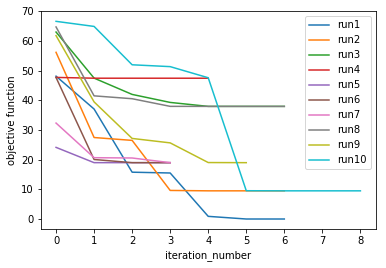

In [396]:
import matplotlib.pyplot as plt
 

for frame in CG_Hislist_egc:
    plt.plot(frame['iteration_number'], frame['obj_function'])
    
plt.xlabel('iteration_number')
plt.ylabel('objective function')

plt.legend(['run1','run2','run3','run4','run5','run6','run7','run8','run9','run10'], loc='upper right')    

# EXERCISE 3

<h5>Let's start with a simple Simulated anealing code , and try to find the rosenbrock fucntion optimumum </h5>

In [170]:
hide_toggle(for_next=True)

Initial X is 2.000
Initial Y is 1.000
Initial Z is 901.000
X is 0.995
Y is 0.991
Final OF is 0.000


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in double_scalars


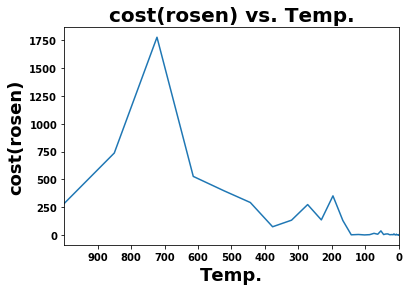

In [399]:
import numpy as np
import matplotlib.pyplot as plt

#Created on Fri Jun  7 15:36:40 2019
#@author: Amine


x0 = 2 # Initial solution we want to start at
y0 = 1

k = 0.1
T0 = 1000        #initial temperature 
M = 300
N = 15          # number of itterations before temp increase 
alpha = 0.85    # temperature decrease rate (geometric)

z_int = 100*(y0-x0**2)**2+(1-x0)**2

print("Initial X is %.3f" % x0)
print("Initial Y is %.3f" % y0)
print("Initial Z is %.3f" % z_int)


temp = []
min_z = []

for i in range(M):
    for j in range(N):
        xt = 0
        yt = 0
        
        ran_x_1 = np.random.rand()
        ran_x_2 = np.random.rand()
        ran_y_1 = np.random.rand()
        ran_y_2 = np.random.rand()
        
        if ran_x_1 >= 0.5:
            x1 = k*ran_x_2
        else:
            x1 = -k*ran_x_2
        
        if ran_y_1 >= 0.5:
            y1 = k*ran_y_2
        else:
            y1 = -k*ran_y_2
            
        xt = x0+x1
        yt = y0+y1
        
        of_new = 100*(yt-xt**2)**2+(1-xt)**2
        
        of_current = 100*(y0-x0**2)**2+(1-x0)**2
        
        
        ran_1 = np.random.rand()
        form = 1/(np.exp((of_new-of_current)/T0))
        
        if of_new <= of_current:
            x0 = xt
            y0 = yt
        elif ran_1<=form:
            x0 = xt
            y0 = yt
        else:
            x0 = x0
            y0 = y0
        
    temp = np.append(temp,T0)
    min_z = np.append(min_z,of_current)
    T0 = alpha*T0


print("X is %.3f" % x0)
print("Y is %.3f" % y0)
print("Final OF is %.3f" % of_current)


plt.plot(temp,min_z)
plt.title("cost(rosen) vs. Temp.",fontsize=20, fontweight='bold')
plt.xlabel("Temp.",fontsize=18, fontweight='bold')
plt.ylabel("cost(rosen)",fontsize=18, fontweight='bold')

plt.xlim(1000,0)
plt.xticks(np.arange(min(temp),max(temp),100),fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()


### Genetic Algorithm 

In [169]:
hide_toggle(for_next=True)

In [50]:
import random as rd


#    p_c = 1 # probability of crossover (always crossover)
#    p_m = 0.2 # probability of mutation
#    K = 3     
#    pop = 160  #population size
#    gen = 60   #number of generations 
# Calculate fitness value

XY0 = np.array([0,1,0,0,0,1,0,0,1,0,1,1,1,0,1,1,1,0,0,1,0,1,1,0,1,1])
XY_Encoded_Before = np.array([0,1,0,0,0,1,0,0,1,0,1,1,1,0,1,1,1,0,0,1,0,1,1,0,1,1])

#############################################################

def objective_value(array,f):  
    
    a_X = -5.
    b_X = 5.
    l_X = (len(array)//2) # Length of chromosome X
    
    a_Y = -5.
    b_Y = 5.
    l_Y = (len(array)//2) # Length of chromosome X
    
    Precision_X = (b_X-a_X)/((2**l_X)-1)
    Precision_Y = (b_Y-a_Y)/((2**l_Y)-1)
    
    # [0,1,0,0,0,1,0,0,1,0,1,1,1,0,1,1,1,0,0,1,0,1,1,0,1,1]
    
    z = 0
    t = 1
    X0_num_Sum = 0
    
    for i in range(len(array)//2):
        X0_sum = array[-t]*(2**z)
        X0_num_Sum = X0_num_Sum + X0_sum
        t = t+1
        z = z+1   
    
    p = 0
    u = 1 + (len(array)//2)
    Y0_num_Sum = 0
    
    for j in range(len(array)//2):
        Y0_sum = array[-u]*(2**p)
        Y0_num_Sum = Y0_num_Sum + Y0_sum
        u = u+1
        p = p+1
    
    Decoded_X = (X0_num_Sum*Precision_X)+a_X
    Decoded_Y = (Y0_num_Sum*Precision_Y)+a_Y
    
    OF_So_Far = f(Decoded_X,Decoded_Y)
    
    return Decoded_X,Decoded_Y,OF_So_Far


#####################################################     
    
def genetic(p_c, p_m,pop,gen,K,f):
    # x and y, 13 for x and 13 for y
    
    n_list = np.empty((0,len(XY0)))
    
    for i in range(pop): # Shuffle the elements in the vector n times and store them
        rd.shuffle(XY0)
        n_list = np.vstack((n_list,XY0))
    
         
    
    Final_Best_in_Generation_X = []
    Final_Worse_in_Generation_X = []
    
    For_Plotting_the_Best = np.empty((0,len(XY0)+1))
    
    One_Final_Guy = np.empty((0,len(XY0)+2))
    One_Finel_Guy_Final = []
    
    Min_for_all_Generations_for_Mut_1 = np.empty((0,len(XY0)+1))
    Min_for_all_Generations_for_Mut_2 = np.empty((0,len(XY0)+1))
    
    Min_for_all_Generations_for_Mut_1_1 = np.empty((0,len(XY0)+2))
    Min_for_all_Generations_for_Mut_2_2 = np.empty((0,len(XY0)+2))
    
    Min_for_all_Generations_for_Mut_1_1_1 = np.empty((0,len(XY0)+2))
    Min_for_all_Generations_for_Mut_2_2_2 = np.empty((0,len(XY0)+2))
    
    
    
    Generation = 1
    
    for i in range(gen):
        
        
        New_Population = np.empty((0,len(XY0))) # Saving the new generation
        
        All_in_Generation_X_1 = np.empty((0,len(XY0)+1))
        All_in_Generation_X_2 = np.empty((0,len(XY0)+1))
        
        Min_in_Generation_X_1 = []
        Min_in_Generation_X_2 = []
        
        Save_Best_in_Generation_X = np.empty((0,len(XY0)+1))
        Final_Best_in_Genration_X = []
        Final_Worst_in_Genration_X = []
        
        print("--> Generation: #", Generation)
            
        Family = 1
        
        for j in range(int(pop/2)): # Range N/2
            
            print("--> Family: #", Family)
                
            # Tournament Selection
            
            Parents = np.empty((0,len(XY0)))
            
            for i in range(2):
                
                Battle_Troops = []
                
                Warrior_1_index = np.random.randint(0,len(n_list)) # e.g. 5
                Warrior_2_index = np.random.randint(0,len(n_list))
                Warrior_3_index = np.random.randint(0,len(n_list))
                
                while Warrior_1_index==Warrior_2_index:
                    Warrior_1_index = np.random.randint(0,len(n_list))
                while Warrior_2_index==Warrior_3_index:
                    Warrior_3_index = np.random.randint(0,len(n_list))
                while Warrior_1_index==Warrior_3_index:
                    Warrior_3_index = np.random.randint(0,len(n_list))
                    
                Warrior_1 = n_list[Warrior_1_index] # n_list[5]
                Warrior_2 = n_list[Warrior_2_index]
                Warrior_3 = n_list[Warrior_3_index]
                
                Battle_Troops = [Warrior_1,Warrior_2,Warrior_3]
                
                ### Warrior 1
                
                OF_So_Far_W1 = objective_value(Warrior_1,f)[2]
                
                Prize_Warrior_1 = OF_So_Far_W1
                
                
                ### Warrior 2
                
                OF_So_Far_W2 = objective_value(Warrior_2,f)[2]
                
                Prize_Warrior_2 = OF_So_Far_W2
                
                ### Warrior 3
                
                OF_So_Far_W3 = objective_value(Warrior_3,f)[2]
                
                Prize_Warrior_3 = OF_So_Far_W3
                
                if Prize_Warrior_1 == min(Prize_Warrior_1,Prize_Warrior_2,Prize_Warrior_3):
                    Winner = Warrior_1
                    Winner_str = "Warrior_1"
                    Prize = Prize_Warrior_1
                elif Prize_Warrior_2 == min(Prize_Warrior_1,Prize_Warrior_2,Prize_Warrior_3):
                    Winner = Warrior_2
                    Winner_str = "Warrior_2"
                    Prize = Prize_Warrior_2
                else:
                    Winner = Warrior_3
                    Winner_str = "Warrior_3"
                    Prize = Prize_Warrior_3
                
                Parents = np.vstack((Parents,Winner))
                
                
            Parent_1 = Parents[0,:]
            Parent_2 = Parents[1,:]
            
            
            
            
            
            # Crossover
            
            Child_1 = np.empty((0,len(XY0)))
            Child_2 = np.empty((0,len(XY0)))
            
            # Where to crossover
            
            Ran_CO_1 = np.random.rand()
            
            if Ran_CO_1 < p_c:
                
                Cr_1 = np.random.randint(0,len(XY0))
                Cr_2 = np.random.randint(0,len(XY0))
                
                while Cr_1 == Cr_2:
                    Cr_2 = np.random.randint(0,len(XY0))
                    
                if Cr_1 < Cr_2:
                    
                    # [0,1,0,0,0,1,0,0,1,0,1,1,1,0,1,1,1,0,0,1,0,1,1,0,1,1]
                    
                    
                    Mid_Seg_1 = Parent_1[Cr_1:Cr_2+1]
                    Mid_Seg_2 = Parent_2[Cr_1:Cr_2+1]
                    
                    First_Seg_1 = Parent_1[:Cr_1]
                    Last_Seg_1 = Parent_1[Cr_2+1:]
                    
                    First_Seg_2 = Parent_2[:Cr_1]
                    Last_Seg_2 = Parent_2[Cr_2+1:]
                
                    Child_1 = np.concatenate((First_Seg_1,Mid_Seg_2,Last_Seg_1))
                    Child_2 = np.concatenate((First_Seg_2,Mid_Seg_1,Last_Seg_2))
                    
                else:
                    
                    Mid_Seg_1 = Parent_1[Cr_2:Cr_1+1]
                    Mid_Seg_2 = Parent_2[Cr_2:Cr_1+1]
                    
                    First_Seg_1 = Parent_1[:Cr_2]
                    Last_Seg_1 = Parent_1[Cr_1+1:]
                    
                    First_Seg_2 = Parent_2[:Cr_2]
                    Last_Seg_2 = Parent_2[Cr_1+1:]
                
                    Child_1 = np.concatenate((First_Seg_1,Mid_Seg_2,Last_Seg_1))
                    Child_2 = np.concatenate((First_Seg_2,Mid_Seg_1,Last_Seg_2))
                
            else:
                
                Child_1 = Parent_1
                Child_2 = Parent_2
              
            
            # Mutation
            
            # Mutated_Child_1
            
            Mutated_Child_1 = []
            
            # [0,1,0,0,0,1,0,0,1,0,1,1,1,0,1,1,1,0,0,1,0,1,1,0,1,1]
            
            t = 0
            
            for i in Child_1:
                rand_Mut_1 = np.random.rand() # prob. to mutate
                
                if rand_Mut_1 < p_m:
                    if Child_1[t] == 0:
                        Child_1[t] = 1
                    else:
                        Child_1[t] = 0
                    t = t+1
                
                    Mutated_Child_1 = Child_1
                
                else:
                    Mutated_Child_1 = Child_1
                
            
            # Mutated_Child_2
            
            Mutated_Child_2 = []
            
            
            t = 0
            
            for i in Child_2:
                rand_Mut_2 = np.random.rand() # prob. to mutate
                
                if rand_Mut_2 < p_m:
                    if Child_2[t] == 0:
                        Child_2[t] = 1
                    else:
                        Child_2[t] = 0
                    t = t+1
                
                    Mutated_Child_2 = Child_2
                
                else:
                    Mutated_Child_2 = Child_2
                
            
            
            
            # For Mutated_1
            OF_So_Far_MC_1 = objective_value(Mutated_Child_1,f)[2]
            
            
            # For Mutated_2
            OF_So_Far_MC_2 = objective_value(Mutated_Child_2,f)[2]
            
            
            print()
            print("FV at Mutated Child #1 at Generation #",Generation,":",OF_So_Far_MC_1)
            print("FV at Mutated Child #2 at Generation #",Generation,":",OF_So_Far_MC_2)
    
    
            All_in_Generation_X_1_1_temp = Mutated_Child_1[np.newaxis]
            All_in_Generation_X_1_1 = np.column_stack((OF_So_Far_MC_1,All_in_Generation_X_1_1_temp))
    
            All_in_Generation_X_2_1_temp = Mutated_Child_2[np.newaxis]
            All_in_Generation_X_2_1 = np.column_stack((OF_So_Far_MC_2,All_in_Generation_X_2_1_temp))
            
            All_in_Generation_X_1 = np.vstack((All_in_Generation_X_1,All_in_Generation_X_1_1))
            All_in_Generation_X_2 = np.vstack((All_in_Generation_X_2,All_in_Generation_X_2_1))
            
            Save_Best_in_Generation_X = np.vstack((All_in_Generation_X_1,All_in_Generation_X_2))
            
            New_Population = np.vstack((New_Population, Mutated_Child_1, Mutated_Child_2))
            
            
            t = 0
            r_1 = []
            
            for i in All_in_Generation_X_1:
                if(All_in_Generation_X_1[t,:1]) <= min(All_in_Generation_X_1[:,:1]):
                    r_1 = All_in_Generation_X_1[t,:]
                t = t+1
    
    
            Min_in_Generation_X_1 = r_1[np.newaxis]
            
            t = 0
            r_2 = []
            
            for i in All_in_Generation_X_2:
                if(All_in_Generation_X_2[t,:1]) <= min(All_in_Generation_X_2[:,:1]):
                    r_2 = All_in_Generation_X_2[t,:]
                t = t+1
    
    
            Min_in_Generation_X_2 = r_2[np.newaxis]
            
            Family = Family+1
            
            
            
        t = 0
        r_final = []
        
        for i in Save_Best_in_Generation_X:
            
            if(Save_Best_in_Generation_X[t,:1]) <= min(Save_Best_in_Generation_X[:,:1]):
                r_final = Save_Best_in_Generation_X[t,]
            t = t+1
            
        Final_Best_in_Genration_X = r_final[np.newaxis]
            
        For_Plotting_the_Best = np.vstack((For_Plotting_the_Best,Final_Best_in_Genration_X))
        
        
        t = 0
        r_2_final = []
        
        for i in Save_Best_in_Generation_X:
            
            if(Save_Best_in_Generation_X[t,:1]) >= max(Save_Best_in_Generation_X[:,:1]):
                r_2_final = Save_Best_in_Generation_X[t,]
            t = t+1
            
        Final_Worst_in_Genration_X = r_2_final[np.newaxis]
        
        
        # Elitism
        
        Darwin_Guy = Final_Best_in_Genration_X[:]
        Not_So_Darwin_Guy = Final_Worst_in_Genration_X[:]
        
        Darwin_Guy = Darwin_Guy[0:,1:].tolist()
        Not_So_Darwin_Guy = Not_So_Darwin_Guy[0:,1:].tolist()
        
        
        Best_1 = np.where((New_Population==Darwin_Guy).all(axis=1))
        Worst_1 = np.where((New_Population==Not_So_Darwin_Guy).all(axis=1))
            
            
        New_Population[Worst_1] = Darwin_Guy
        
        n_list = New_Population
        
        
        Min_for_all_Generations_for_Mut_1 = np.vstack((Min_for_all_Generations_for_Mut_1,Min_in_Generation_X_1))
                
        Min_for_all_Generations_for_Mut_2 = np.vstack((Min_for_all_Generations_for_Mut_2,Min_in_Generation_X_2))       
                
        
        
        Min_for_all_Generations_for_Mut_1_1 = np.insert(Min_in_Generation_X_1,0,Generation) 
        Min_for_all_Generations_for_Mut_2_2 = np.insert(Min_in_Generation_X_2,0,Generation)
    
        
        Min_for_all_Generations_for_Mut_1_1_1 = np.vstack((Min_for_all_Generations_for_Mut_1_1_1,Min_for_all_Generations_for_Mut_1_1))
        Min_for_all_Generations_for_Mut_2_2_2 = np.vstack((Min_for_all_Generations_for_Mut_2_2_2,Min_for_all_Generations_for_Mut_2_2))      
                
        Generation = Generation+1       
                
        
    One_Final_Guy = np.vstack((Min_for_all_Generations_for_Mut_1_1_1,Min_for_all_Generations_for_Mut_2_2_2))
    
    t = 0
    Final_Here = []
    
    for i in One_Final_Guy:
        if(One_Final_Guy[t,1]) <= min (One_Final_Guy[:,1]):
            Final_Here = One_Final_Guy[t,:]
        t = t+1
    
    One_Final_Guy_Final = Final_Here[np.newaxis]
    
    print()
    print("Min in all Generation:",One_Final_Guy_Final.tolist())
    print("Min in Cost:",One_Final_Guy_Final[:,1])
    print()
    
    A = (One_Final_Guy_Final[:,1])
    
    plt.plot(For_Plotting_the_Best[:,0])
    plt.axhline(y=A,color='r',linestyle='--')
    plt.title("Z Reached Through Generations",fontsize=20,fontweight='bold')
    plt.xlabel("Generations",fontsize=18,fontweight='bold')
    plt.ylabel("Z",fontsize=18,fontweight='bold')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    
    xyz = (Generation/4,A)
    xyzz = (Generation/3.7,A+0.5)
    
    plt.annotate("Minimum Cost Reached at: %0.3f" % A, xy=xyz, xytext=xyzz,
                 arrowprops=dict(facecolor='black',shrink=1,width=1,headwidth=5),
                 fontsize=12,fontweight='bold')
    
    plt.show()
    
    # [Generation number, ftness value, 0,1,0,0,0,1,0,0,1,0,1,1,1,0,1,1,1,0,0,1,0,1,1,0,1,1]
    
    XY0_Encoded_After = Final_Here[2:]
    
    
    # DECODING
    # DECODING
    # DECODING
    
    
    Final_Solution = objective_value(XY0_Encoded_After,f)
    
    
    print()
    print()
    print("X After:",Final_Solution[0])
    print("Y After:",Final_Solution[1])
    print("OF After:",Final_Solution[2])
    
    

<h5><br>Let's apply our algorithm to find the fittest individual on all generations : </br></h5>

--> Generation: # 1
--> Family: # 1

FV at Mutated Child #1 at Generation # 1 : 438.57666396493727
FV at Mutated Child #2 at Generation # 1 : 13291.558943070337
--> Family: # 2

FV at Mutated Child #1 at Generation # 1 : 111.79029411243435
FV at Mutated Child #2 at Generation # 1 : 8.344798086360129
--> Family: # 3

FV at Mutated Child #1 at Generation # 1 : 1110.3666539127464
FV at Mutated Child #2 at Generation # 1 : 47.74176576228169
--> Family: # 4

FV at Mutated Child #1 at Generation # 1 : 6399.471199137567
FV at Mutated Child #2 at Generation # 1 : 2394.4516782730157
--> Family: # 5

FV at Mutated Child #1 at Generation # 1 : 22.67904441396539
FV at Mutated Child #2 at Generation # 1 : 4901.714418508196
--> Family: # 6

FV at Mutated Child #1 at Generation # 1 : 5342.655378315731
FV at Mutated Child #2 at Generation # 1 : 349.8878294406733
--> Family: # 7

FV at Mutated Child #1 at Generation # 1 : 5996.5981570953145
FV at Mutated Child #2 at Generation # 1 : 404.3846225754313
-

--> Family: # 76

FV at Mutated Child #1 at Generation # 1 : 999.4739823183684
FV at Mutated Child #2 at Generation # 1 : 1233.4590474879167
--> Family: # 77

FV at Mutated Child #1 at Generation # 1 : 429.85904227260625
FV at Mutated Child #2 at Generation # 1 : 1384.544513767615
--> Family: # 78

FV at Mutated Child #1 at Generation # 1 : 5835.919244270971
FV at Mutated Child #2 at Generation # 1 : 1026.1656550619957
--> Family: # 79

FV at Mutated Child #1 at Generation # 1 : 4543.470875321045
FV at Mutated Child #2 at Generation # 1 : 3248.471668066123
--> Family: # 80

FV at Mutated Child #1 at Generation # 1 : 1414.9252987902546
FV at Mutated Child #2 at Generation # 1 : 431.7238153091493
--> Generation: # 2
--> Family: # 1

FV at Mutated Child #1 at Generation # 2 : 400.741607050254
FV at Mutated Child #2 at Generation # 2 : 1337.3809422335205
--> Family: # 2

FV at Mutated Child #1 at Generation # 2 : 321.0017299777128
FV at Mutated Child #2 at Generation # 2 : 1071.81627674790

FV at Mutated Child #2 at Generation # 2 : 67.33347309611653
--> Family: # 61

FV at Mutated Child #1 at Generation # 2 : 484.65956549999794
FV at Mutated Child #2 at Generation # 2 : 2588.4647118962143
--> Family: # 62

FV at Mutated Child #1 at Generation # 2 : 308.97801309547447
FV at Mutated Child #2 at Generation # 2 : 438.3574885187855
--> Family: # 63

FV at Mutated Child #1 at Generation # 2 : 87.319535402797
FV at Mutated Child #2 at Generation # 2 : 177.5093455813001
--> Family: # 64

FV at Mutated Child #1 at Generation # 2 : 75.84167450488789
FV at Mutated Child #2 at Generation # 2 : 490.58566536232746
--> Family: # 65

FV at Mutated Child #1 at Generation # 2 : 560.7644238328027
FV at Mutated Child #2 at Generation # 2 : 1026.3549146017203
--> Family: # 66

FV at Mutated Child #1 at Generation # 2 : 376.56373926612065
FV at Mutated Child #2 at Generation # 2 : 8.198931701692116
--> Family: # 67

FV at Mutated Child #1 at Generation # 2 : 129.82847635998206
FV at Mutated C

--> Family: # 74

FV at Mutated Child #1 at Generation # 3 : 328.7363879471167
FV at Mutated Child #2 at Generation # 3 : 46071.56633470698
--> Family: # 75

FV at Mutated Child #1 at Generation # 3 : 89.17836535988019
FV at Mutated Child #2 at Generation # 3 : 215.02508051512757
--> Family: # 76

FV at Mutated Child #1 at Generation # 3 : 346.1820939621054
FV at Mutated Child #2 at Generation # 3 : 211.72994732116388
--> Family: # 77

FV at Mutated Child #1 at Generation # 3 : 2902.619585777001
FV at Mutated Child #2 at Generation # 3 : 2879.3615751172583
--> Family: # 78

FV at Mutated Child #1 at Generation # 3 : 2351.6151975196854
FV at Mutated Child #2 at Generation # 3 : 253.958268920372
--> Family: # 79

FV at Mutated Child #1 at Generation # 3 : 23.690311995438712
FV at Mutated Child #2 at Generation # 3 : 57.28187207506065
--> Family: # 80

FV at Mutated Child #1 at Generation # 3 : 313.3822727130134
FV at Mutated Child #2 at Generation # 3 : 537.1592164043406
--> Generation: 

FV at Mutated Child #2 at Generation # 5 : 82.6151585055086
--> Family: # 15

FV at Mutated Child #1 at Generation # 5 : 66.93839051901321
FV at Mutated Child #2 at Generation # 5 : 314.965421256255
--> Family: # 16

FV at Mutated Child #1 at Generation # 5 : 24941.832924773415
FV at Mutated Child #2 at Generation # 5 : 41897.865542427164
--> Family: # 17

FV at Mutated Child #1 at Generation # 5 : 271.224762571209
FV at Mutated Child #2 at Generation # 5 : 2.5131826668694814
--> Family: # 18

FV at Mutated Child #1 at Generation # 5 : 157.8597883835608
FV at Mutated Child #2 at Generation # 5 : 13.578894650914584
--> Family: # 19

FV at Mutated Child #1 at Generation # 5 : 82.93923197094847
FV at Mutated Child #2 at Generation # 5 : 15.664297971135333
--> Family: # 20

FV at Mutated Child #1 at Generation # 5 : 39008.00120985539
FV at Mutated Child #2 at Generation # 5 : 19338.40975487083
--> Family: # 21

FV at Mutated Child #1 at Generation # 5 : 104.2170475510419
FV at Mutated Chil


FV at Mutated Child #1 at Generation # 6 : 39.653286650509195
FV at Mutated Child #2 at Generation # 6 : 17.29028460171503
--> Family: # 62

FV at Mutated Child #1 at Generation # 6 : 38.85387134190074
FV at Mutated Child #2 at Generation # 6 : 15.757457204083682
--> Family: # 63

FV at Mutated Child #1 at Generation # 6 : 399.50943902303266
FV at Mutated Child #2 at Generation # 6 : 5.686994174604294
--> Family: # 64

FV at Mutated Child #1 at Generation # 6 : 102.60966113939477
FV at Mutated Child #2 at Generation # 6 : 24.109775791397052
--> Family: # 65

FV at Mutated Child #1 at Generation # 6 : 2071.1623940941995
FV at Mutated Child #2 at Generation # 6 : 1987.9634077606406
--> Family: # 66

FV at Mutated Child #1 at Generation # 6 : 113.28682102058306
FV at Mutated Child #2 at Generation # 6 : 47.16341570756331
--> Family: # 67

FV at Mutated Child #1 at Generation # 6 : 2.2086481130767
FV at Mutated Child #2 at Generation # 6 : 2.3777367164092955
--> Family: # 68

FV at Mutate

--> Family: # 79

FV at Mutated Child #1 at Generation # 7 : 2.8198753781308947
FV at Mutated Child #2 at Generation # 7 : 64.87366506983834
--> Family: # 80

FV at Mutated Child #1 at Generation # 7 : 193.0784559747343
FV at Mutated Child #2 at Generation # 7 : 17.85860714232085
--> Generation: # 8
--> Family: # 1

FV at Mutated Child #1 at Generation # 8 : 2.570853452910606
FV at Mutated Child #2 at Generation # 8 : 1.9005251904918985
--> Family: # 2

FV at Mutated Child #1 at Generation # 8 : 43228.56541807141
FV at Mutated Child #2 at Generation # 8 : 41677.954620776465
--> Family: # 3

FV at Mutated Child #1 at Generation # 8 : 100.75488751332232
FV at Mutated Child #2 at Generation # 8 : 496.07970850696523
--> Family: # 4

FV at Mutated Child #1 at Generation # 8 : 2.686596897173969
FV at Mutated Child #2 at Generation # 8 : 0.5525270688928496
--> Family: # 5

FV at Mutated Child #1 at Generation # 8 : 595.4586849255347
FV at Mutated Child #2 at Generation # 8 : 53.89680585334174

FV at Mutated Child #1 at Generation # 8 : 0.802179387349851
FV at Mutated Child #2 at Generation # 8 : 404.66600779428194
--> Family: # 62

FV at Mutated Child #1 at Generation # 8 : 24.34031241596109
FV at Mutated Child #2 at Generation # 8 : 2.6347696493123394
--> Family: # 63

FV at Mutated Child #1 at Generation # 8 : 4.238510657648223
FV at Mutated Child #2 at Generation # 8 : 28.372919577627368
--> Family: # 64

FV at Mutated Child #1 at Generation # 8 : 351.9171083841299
FV at Mutated Child #2 at Generation # 8 : 442.93468761668197
--> Family: # 65

FV at Mutated Child #1 at Generation # 8 : 543.98261837711
FV at Mutated Child #2 at Generation # 8 : 0.41488731495056413
--> Family: # 66

FV at Mutated Child #1 at Generation # 8 : 0.4921393115946484
FV at Mutated Child #2 at Generation # 8 : 57.01988081449813
--> Family: # 67

FV at Mutated Child #1 at Generation # 8 : 98.50088804364613
FV at Mutated Child #2 at Generation # 8 : 30.99488317143929
--> Family: # 68

FV at Mutated C

--> Family: # 41

FV at Mutated Child #1 at Generation # 9 : 11.718660606590937
FV at Mutated Child #2 at Generation # 9 : 42.438702525438494
--> Family: # 42

FV at Mutated Child #1 at Generation # 9 : 23.537704064938225
FV at Mutated Child #2 at Generation # 9 : 97.73394337164831
--> Family: # 43

FV at Mutated Child #1 at Generation # 9 : 40.2556239055749
FV at Mutated Child #2 at Generation # 9 : 2.3941871957290513
--> Family: # 44

FV at Mutated Child #1 at Generation # 9 : 125.9392199189156
FV at Mutated Child #2 at Generation # 9 : 17.778897468368058
--> Family: # 45

FV at Mutated Child #1 at Generation # 9 : 1400.174392527013
FV at Mutated Child #2 at Generation # 9 : 2098.79072418223
--> Family: # 46

FV at Mutated Child #1 at Generation # 9 : 2.079931334728073
FV at Mutated Child #2 at Generation # 9 : 17.104433137379143
--> Family: # 47

FV at Mutated Child #1 at Generation # 9 : 188.32097515305102
FV at Mutated Child #2 at Generation # 9 : 586.380305164922
--> Family: # 48

FV at Mutated Child #2 at Generation # 10 : 22.792386817729383
--> Family: # 72

FV at Mutated Child #1 at Generation # 10 : 510.91886361302323
FV at Mutated Child #2 at Generation # 10 : 5.603132734428224
--> Family: # 73

FV at Mutated Child #1 at Generation # 10 : 3354.5081053239287
FV at Mutated Child #2 at Generation # 10 : 1502.712708431595
--> Family: # 74

FV at Mutated Child #1 at Generation # 10 : 8.217677597812937
FV at Mutated Child #2 at Generation # 10 : 2406.0577203797448
--> Family: # 75

FV at Mutated Child #1 at Generation # 10 : 0.9543129018945677
FV at Mutated Child #2 at Generation # 10 : 1.27199712835213
--> Family: # 76

FV at Mutated Child #1 at Generation # 10 : 5.12078122180707
FV at Mutated Child #2 at Generation # 10 : 73.46905588478916
--> Family: # 77

FV at Mutated Child #1 at Generation # 10 : 4.753527650003688
FV at Mutated Child #2 at Generation # 10 : 18.67600717539851
--> Family: # 78

FV at Mutated Child #1 at Generation # 10 : 10.199140020876316
FV

FV at Mutated Child #2 at Generation # 11 : 7.587465072284528
--> Family: # 59

FV at Mutated Child #1 at Generation # 11 : 33.06492592430115
FV at Mutated Child #2 at Generation # 11 : 17.90544231310965
--> Family: # 60

FV at Mutated Child #1 at Generation # 11 : 214.73439812526127
FV at Mutated Child #2 at Generation # 11 : 4.902759760080111
--> Family: # 61

FV at Mutated Child #1 at Generation # 11 : 9.784737839096714
FV at Mutated Child #2 at Generation # 11 : 16.27428920568727
--> Family: # 62

FV at Mutated Child #1 at Generation # 11 : 148.03325666052325
FV at Mutated Child #2 at Generation # 11 : 206.52463188109508
--> Family: # 63

FV at Mutated Child #1 at Generation # 11 : 14.74823779422974
FV at Mutated Child #2 at Generation # 11 : 0.9242815994838659
--> Family: # 64

FV at Mutated Child #1 at Generation # 11 : 17.268208011684855
FV at Mutated Child #2 at Generation # 11 : 21.060656014400088
--> Family: # 65

FV at Mutated Child #1 at Generation # 11 : 149.7550538242567


--> Family: # 38

FV at Mutated Child #1 at Generation # 12 : 551.5109545047887
FV at Mutated Child #2 at Generation # 12 : 39.35688982533302
--> Family: # 39

FV at Mutated Child #1 at Generation # 12 : 1.7093354102973704
FV at Mutated Child #2 at Generation # 12 : 36.444800812906855
--> Family: # 40

FV at Mutated Child #1 at Generation # 12 : 13.186056501702177
FV at Mutated Child #2 at Generation # 12 : 1.3788351433940567
--> Family: # 41

FV at Mutated Child #1 at Generation # 12 : 3.357098859322246
FV at Mutated Child #2 at Generation # 12 : 0.8859416427674769
--> Family: # 42

FV at Mutated Child #1 at Generation # 12 : 1.0273834879369375
FV at Mutated Child #2 at Generation # 12 : 0.8066692702067089
--> Family: # 43

FV at Mutated Child #1 at Generation # 12 : 111.51977829967602
FV at Mutated Child #2 at Generation # 12 : 92.88065725581829
--> Family: # 44

FV at Mutated Child #1 at Generation # 12 : 114.67463471527384
FV at Mutated Child #2 at Generation # 12 : 1.3918441953264

--> Family: # 79

FV at Mutated Child #1 at Generation # 13 : 32.125291823249675
FV at Mutated Child #2 at Generation # 13 : 38.23425832397513
--> Family: # 80

FV at Mutated Child #1 at Generation # 13 : 43.66689500988317
FV at Mutated Child #2 at Generation # 13 : 6.02480003853295
--> Generation: # 14
--> Family: # 1

FV at Mutated Child #1 at Generation # 14 : 14.250742001249757
FV at Mutated Child #2 at Generation # 14 : 1.7394707065491433
--> Family: # 2

FV at Mutated Child #1 at Generation # 14 : 2.1558184745011655
FV at Mutated Child #2 at Generation # 14 : 2.136799578276538
--> Family: # 3

FV at Mutated Child #1 at Generation # 14 : 3216.272073296412
FV at Mutated Child #2 at Generation # 14 : 2296.20335259545
--> Family: # 4

FV at Mutated Child #1 at Generation # 14 : 1.1240063830989728
FV at Mutated Child #2 at Generation # 14 : 447.2864146713313
--> Family: # 5

FV at Mutated Child #1 at Generation # 14 : 0.969199607787234
FV at Mutated Child #2 at Generation # 14 : 1.323

FV at Mutated Child #1 at Generation # 15 : 15.445941686909721
FV at Mutated Child #2 at Generation # 15 : 8.256623998090271
--> Family: # 24

FV at Mutated Child #1 at Generation # 15 : 18.988631343733577
FV at Mutated Child #2 at Generation # 15 : 9.774049667070898
--> Family: # 25

FV at Mutated Child #1 at Generation # 15 : 23.862552974989754
FV at Mutated Child #2 at Generation # 15 : 20.817850306345875
--> Family: # 26

FV at Mutated Child #1 at Generation # 15 : 167.12316789254666
FV at Mutated Child #2 at Generation # 15 : 44.18407995706782
--> Family: # 27

FV at Mutated Child #1 at Generation # 15 : 22.81882025440221
FV at Mutated Child #2 at Generation # 15 : 2.6165331479097858
--> Family: # 28

FV at Mutated Child #1 at Generation # 15 : 1.0954236998070739
FV at Mutated Child #2 at Generation # 15 : 22.81882025440221
--> Family: # 29

FV at Mutated Child #1 at Generation # 15 : 37.495144088527994
FV at Mutated Child #2 at Generation # 15 : 2435.354839887472
--> Family: # 30

--> Family: # 2

FV at Mutated Child #1 at Generation # 16 : 591.3480052539712
FV at Mutated Child #2 at Generation # 16 : 0.7248633104603501
--> Family: # 3

FV at Mutated Child #1 at Generation # 16 : 2.8070954635504193
FV at Mutated Child #2 at Generation # 16 : 2.7125070598740164
--> Family: # 4

FV at Mutated Child #1 at Generation # 16 : 0.7606794923410389
FV at Mutated Child #2 at Generation # 16 : 4.450852241473423
--> Family: # 5

FV at Mutated Child #1 at Generation # 16 : 1.4076091303617764
FV at Mutated Child #2 at Generation # 16 : 120.43457401178931
--> Family: # 6

FV at Mutated Child #1 at Generation # 16 : 0.4802197946072844
FV at Mutated Child #2 at Generation # 16 : 0.8096036964089863
--> Family: # 7

FV at Mutated Child #1 at Generation # 16 : 18.196068762385288
FV at Mutated Child #2 at Generation # 16 : 0.665732441703893
--> Family: # 8

FV at Mutated Child #1 at Generation # 16 : 2.6799009275597383
FV at Mutated Child #2 at Generation # 16 : 2.8517947401511856
--

--> Family: # 80

FV at Mutated Child #1 at Generation # 16 : 2.143216647837206
FV at Mutated Child #2 at Generation # 16 : 5.349201221900735
--> Generation: # 17
--> Family: # 1

FV at Mutated Child #1 at Generation # 17 : 1.3815318277000002
FV at Mutated Child #2 at Generation # 17 : 31.306985733185744
--> Family: # 2

FV at Mutated Child #1 at Generation # 17 : 18.789017129697513
FV at Mutated Child #2 at Generation # 17 : 23.064198522746313
--> Family: # 3

FV at Mutated Child #1 at Generation # 17 : 1.728306997803492
FV at Mutated Child #2 at Generation # 17 : 24.836487302981105
--> Family: # 4

FV at Mutated Child #1 at Generation # 17 : 1934.9648679512327
FV at Mutated Child #2 at Generation # 17 : 6418.43566566729
--> Family: # 5

FV at Mutated Child #1 at Generation # 17 : 3.403543307923137
FV at Mutated Child #2 at Generation # 17 : 2532.5451341138373
--> Family: # 6

FV at Mutated Child #1 at Generation # 17 : 1.284815703242083
FV at Mutated Child #2 at Generation # 17 : 1.2

--> Family: # 77

FV at Mutated Child #1 at Generation # 17 : 2.0442802436334313
FV at Mutated Child #2 at Generation # 17 : 57.36250635339297
--> Family: # 78

FV at Mutated Child #1 at Generation # 17 : 13.004682280601216
FV at Mutated Child #2 at Generation # 17 : 46.024355550289336
--> Family: # 79

FV at Mutated Child #1 at Generation # 17 : 43.77195169075077
FV at Mutated Child #2 at Generation # 17 : 50.03399781668649
--> Family: # 80

FV at Mutated Child #1 at Generation # 17 : 5.4978985515552035
FV at Mutated Child #2 at Generation # 17 : 1.6193956268429481
--> Generation: # 18
--> Family: # 1

FV at Mutated Child #1 at Generation # 18 : 0.6047196367231782
FV at Mutated Child #2 at Generation # 18 : 0.556554702571115
--> Family: # 2

FV at Mutated Child #1 at Generation # 18 : 3.418948287114259
FV at Mutated Child #2 at Generation # 18 : 79.12194283822953
--> Family: # 3

FV at Mutated Child #1 at Generation # 18 : 0.5769298629293161
FV at Mutated Child #2 at Generation # 18 :

FV at Mutated Child #1 at Generation # 18 : 0.9030574708329944
FV at Mutated Child #2 at Generation # 18 : 1.2089754821789684
--> Family: # 69

FV at Mutated Child #1 at Generation # 18 : 1.0373405537676321
FV at Mutated Child #2 at Generation # 18 : 7.935886408373652
--> Family: # 70

FV at Mutated Child #1 at Generation # 18 : 4.047631334003947
FV at Mutated Child #2 at Generation # 18 : 23.41603746111088
--> Family: # 71

FV at Mutated Child #1 at Generation # 18 : 96.46494078232648
FV at Mutated Child #2 at Generation # 18 : 99.39125855101388
--> Family: # 72

FV at Mutated Child #1 at Generation # 18 : 4.6022120728209135
FV at Mutated Child #2 at Generation # 18 : 6.921262866047159
--> Family: # 73

FV at Mutated Child #1 at Generation # 18 : 130.15067132411298
FV at Mutated Child #2 at Generation # 18 : 0.6028969825893828
--> Family: # 74

FV at Mutated Child #1 at Generation # 18 : 0.6476840110342641
FV at Mutated Child #2 at Generation # 18 : 26.283612701794578
--> Family: # 75

--> Family: # 76

FV at Mutated Child #1 at Generation # 19 : 658.9254684414776
FV at Mutated Child #2 at Generation # 19 : 26.352566287641967
--> Family: # 77

FV at Mutated Child #1 at Generation # 19 : 34.267623778442655
FV at Mutated Child #2 at Generation # 19 : 18.51080073889749
--> Family: # 78

FV at Mutated Child #1 at Generation # 19 : 34.314687074801974
FV at Mutated Child #2 at Generation # 19 : 175.12420875213581
--> Family: # 79

FV at Mutated Child #1 at Generation # 19 : 11.38955019626948
FV at Mutated Child #2 at Generation # 19 : 5.501472289699986
--> Family: # 80

FV at Mutated Child #1 at Generation # 19 : 530.6656782414631
FV at Mutated Child #2 at Generation # 19 : 466.9769696954271
--> Generation: # 20
--> Family: # 1

FV at Mutated Child #1 at Generation # 20 : 2.426112535119799
FV at Mutated Child #2 at Generation # 20 : 154.6444117046028
--> Family: # 2

FV at Mutated Child #1 at Generation # 20 : 124.75924536489819
FV at Mutated Child #2 at Generation # 20 : 

--> Family: # 6

FV at Mutated Child #1 at Generation # 21 : 8.590269838434377
FV at Mutated Child #2 at Generation # 21 : 62.467718015637494
--> Family: # 7

FV at Mutated Child #1 at Generation # 21 : 580.799402124566
FV at Mutated Child #2 at Generation # 21 : 16.99521677999099
--> Family: # 8

FV at Mutated Child #1 at Generation # 21 : 0.6558092796183356
FV at Mutated Child #2 at Generation # 21 : 19.54281337679884
--> Family: # 9

FV at Mutated Child #1 at Generation # 21 : 10.919624018140023
FV at Mutated Child #2 at Generation # 21 : 19.970720458582424
--> Family: # 10

FV at Mutated Child #1 at Generation # 21 : 53.524381918519595
FV at Mutated Child #2 at Generation # 21 : 6.120043428390251
--> Family: # 11

FV at Mutated Child #1 at Generation # 21 : 14.6030173753122
FV at Mutated Child #2 at Generation # 21 : 614.5004033440944
--> Family: # 12

FV at Mutated Child #1 at Generation # 21 : 8.857526679730524
FV at Mutated Child #2 at Generation # 21 : 12.431911220552772
--> Fa

FV at Mutated Child #1 at Generation # 22 : 94.35795385305799
FV at Mutated Child #2 at Generation # 22 : 1.5045201325384752
--> Family: # 8

FV at Mutated Child #1 at Generation # 22 : 101.59170471821696
FV at Mutated Child #2 at Generation # 22 : 1.0422361996970462
--> Family: # 9

FV at Mutated Child #1 at Generation # 22 : 1.375641359599562
FV at Mutated Child #2 at Generation # 22 : 13.190221836772517
--> Family: # 10

FV at Mutated Child #1 at Generation # 22 : 3.712132107869941
FV at Mutated Child #2 at Generation # 22 : 38.354721547348085
--> Family: # 11

FV at Mutated Child #1 at Generation # 22 : 89.52004344307488
FV at Mutated Child #2 at Generation # 22 : 0.651657029093141
--> Family: # 12

FV at Mutated Child #1 at Generation # 22 : 0.5060797826117442
FV at Mutated Child #2 at Generation # 22 : 2.475487323849531
--> Family: # 13

FV at Mutated Child #1 at Generation # 22 : 21.018539040936428
FV at Mutated Child #2 at Generation # 22 : 25.320273307422703
--> Family: # 14



FV at Mutated Child #2 at Generation # 22 : 518.1807136406088
--> Generation: # 23
--> Family: # 1

FV at Mutated Child #1 at Generation # 23 : 28.021586342486735
FV at Mutated Child #2 at Generation # 23 : 18.989996546698055
--> Family: # 2

FV at Mutated Child #1 at Generation # 23 : 1.6821350960301062
FV at Mutated Child #2 at Generation # 23 : 619.305137925044
--> Family: # 3

FV at Mutated Child #1 at Generation # 23 : 612.6866666019347
FV at Mutated Child #2 at Generation # 23 : 40.894706205540665
--> Family: # 4

FV at Mutated Child #1 at Generation # 23 : 17.669219099692036
FV at Mutated Child #2 at Generation # 23 : 11.468788950346756
--> Family: # 5

FV at Mutated Child #1 at Generation # 23 : 28.84329777594604
FV at Mutated Child #2 at Generation # 23 : 9.029999194331655
--> Family: # 6

FV at Mutated Child #1 at Generation # 23 : 7.19814265964461
FV at Mutated Child #2 at Generation # 23 : 20.37139830878109
--> Family: # 7

FV at Mutated Child #1 at Generation # 23 : 2.1428


FV at Mutated Child #1 at Generation # 23 : 27.684216544122748
FV at Mutated Child #2 at Generation # 23 : 43.271970751972404
--> Family: # 77

FV at Mutated Child #1 at Generation # 23 : 3.5235050269995205
FV at Mutated Child #2 at Generation # 23 : 4.908053083681261
--> Family: # 78

FV at Mutated Child #1 at Generation # 23 : 14.79506259721228
FV at Mutated Child #2 at Generation # 23 : 6.1079435590989
--> Family: # 79

FV at Mutated Child #1 at Generation # 23 : 3.266313255772525
FV at Mutated Child #2 at Generation # 23 : 30.312332329576172
--> Family: # 80

FV at Mutated Child #1 at Generation # 23 : 3.280061191564571
FV at Mutated Child #2 at Generation # 23 : 19.859837350290643
--> Generation: # 24
--> Family: # 1

FV at Mutated Child #1 at Generation # 24 : 1.2329226305491745
FV at Mutated Child #2 at Generation # 24 : 31.461708230856967
--> Family: # 2

FV at Mutated Child #1 at Generation # 24 : 3.418886750724159
FV at Mutated Child #2 at Generation # 24 : 0.759557955035933

--> Family: # 63

FV at Mutated Child #1 at Generation # 24 : 0.708655306362554
FV at Mutated Child #2 at Generation # 24 : 93.45509425717566
--> Family: # 64

FV at Mutated Child #1 at Generation # 24 : 4.355517887045057
FV at Mutated Child #2 at Generation # 24 : 0.6845897091442984
--> Family: # 65

FV at Mutated Child #1 at Generation # 24 : 25.629638844112286
FV at Mutated Child #2 at Generation # 24 : 0.44697995698772086
--> Family: # 66

FV at Mutated Child #1 at Generation # 24 : 0.7594261954939803
FV at Mutated Child #2 at Generation # 24 : 47.96759263663285
--> Family: # 67

FV at Mutated Child #1 at Generation # 24 : 29.62354442467935
FV at Mutated Child #2 at Generation # 24 : 1.8345623210902269
--> Family: # 68

FV at Mutated Child #1 at Generation # 24 : 0.42159629994706377
FV at Mutated Child #2 at Generation # 24 : 1.3325726580719972
--> Family: # 69

FV at Mutated Child #1 at Generation # 24 : 22.82838433873757
FV at Mutated Child #2 at Generation # 24 : 1.7975245669298

--> Family: # 4

FV at Mutated Child #1 at Generation # 26 : 461.719648452638
FV at Mutated Child #2 at Generation # 26 : 1.3632285284866974
--> Family: # 5

FV at Mutated Child #1 at Generation # 26 : 23.566422167731304
FV at Mutated Child #2 at Generation # 26 : 7.994409373229841
--> Family: # 6

FV at Mutated Child #1 at Generation # 26 : 0.5828578996660362
FV at Mutated Child #2 at Generation # 26 : 0.7031097936416186
--> Family: # 7

FV at Mutated Child #1 at Generation # 26 : 1.2924325088168518
FV at Mutated Child #2 at Generation # 26 : 0.55208216215118
--> Family: # 8

FV at Mutated Child #1 at Generation # 26 : 3.2078006982274414
FV at Mutated Child #2 at Generation # 26 : 25.22563752491492
--> Family: # 9

FV at Mutated Child #1 at Generation # 26 : 33.320552731442675
FV at Mutated Child #2 at Generation # 26 : 609.9131912783168
--> Family: # 10

FV at Mutated Child #1 at Generation # 26 : 3.4273330171071823
FV at Mutated Child #2 at Generation # 26 : 29.722490739196193
--> F

--> Generation: # 27
--> Family: # 1

FV at Mutated Child #1 at Generation # 27 : 25.857790892503775
FV at Mutated Child #2 at Generation # 27 : 2.3642249587037707
--> Family: # 2

FV at Mutated Child #1 at Generation # 27 : 600.9692392573049
FV at Mutated Child #2 at Generation # 27 : 533.15058021172
--> Family: # 3

FV at Mutated Child #1 at Generation # 27 : 131.38813897713314
FV at Mutated Child #2 at Generation # 27 : 1.9654519732572542
--> Family: # 4

FV at Mutated Child #1 at Generation # 27 : 2455.4211890043075
FV at Mutated Child #2 at Generation # 27 : 605.5926696118893
--> Family: # 5

FV at Mutated Child #1 at Generation # 27 : 11.280027122935495
FV at Mutated Child #2 at Generation # 27 : 9.931187894885081
--> Family: # 6

FV at Mutated Child #1 at Generation # 27 : 648.8540181753216
FV at Mutated Child #2 at Generation # 27 : 0.6959268529890142
--> Family: # 7

FV at Mutated Child #1 at Generation # 27 : 1.7650326041635744
FV at Mutated Child #2 at Generation # 27 : 4.04

--> Family: # 25

FV at Mutated Child #1 at Generation # 28 : 4.857539318073576
FV at Mutated Child #2 at Generation # 28 : 1.533682670255931
--> Family: # 26

FV at Mutated Child #1 at Generation # 28 : 30.026556213788506
FV at Mutated Child #2 at Generation # 28 : 32.279803015429565
--> Family: # 27

FV at Mutated Child #1 at Generation # 28 : 0.9349016713930087
FV at Mutated Child #2 at Generation # 28 : 5.006053001137926
--> Family: # 28

FV at Mutated Child #1 at Generation # 28 : 2.1940152381438986
FV at Mutated Child #2 at Generation # 28 : 1.9492496883081158
--> Family: # 29

FV at Mutated Child #1 at Generation # 28 : 34.55371011073264
FV at Mutated Child #2 at Generation # 28 : 1.8262568038395322
--> Family: # 30

FV at Mutated Child #1 at Generation # 28 : 31.045225386932156
FV at Mutated Child #2 at Generation # 28 : 412.2765108950391
--> Family: # 31

FV at Mutated Child #1 at Generation # 28 : 69.08014608084557
FV at Mutated Child #2 at Generation # 28 : 622.1359000365152

--> Family: # 5

FV at Mutated Child #1 at Generation # 30 : 3.8983984025963307
FV at Mutated Child #2 at Generation # 30 : 5.397858116195569
--> Family: # 6

FV at Mutated Child #1 at Generation # 30 : 5.135945071272429
FV at Mutated Child #2 at Generation # 30 : 7.4021020542041756
--> Family: # 7

FV at Mutated Child #1 at Generation # 30 : 5.809182666041943
FV at Mutated Child #2 at Generation # 30 : 33.366132220445145
--> Family: # 8

FV at Mutated Child #1 at Generation # 30 : 2206.3880065687185
FV at Mutated Child #2 at Generation # 30 : 24.12061807699252
--> Family: # 9

FV at Mutated Child #1 at Generation # 30 : 17.274747403728227
FV at Mutated Child #2 at Generation # 30 : 104.83106140765427
--> Family: # 10

FV at Mutated Child #1 at Generation # 30 : 1.092370264410635
FV at Mutated Child #2 at Generation # 30 : 90.30128560285769
--> Family: # 11

FV at Mutated Child #1 at Generation # 30 : 16.361550709188514
FV at Mutated Child #2 at Generation # 30 : 7.992396649574713
--> 

FV at Mutated Child #2 at Generation # 31 : 109.09765888977756
--> Family: # 18

FV at Mutated Child #1 at Generation # 31 : 1.3572228361775132
FV at Mutated Child #2 at Generation # 31 : 2.0003718959944043
--> Family: # 19

FV at Mutated Child #1 at Generation # 31 : 11.736069646254228
FV at Mutated Child #2 at Generation # 31 : 3.7622929158402107
--> Family: # 20

FV at Mutated Child #1 at Generation # 31 : 2410.1226945696453
FV at Mutated Child #2 at Generation # 31 : 6.433025689724113
--> Family: # 21

FV at Mutated Child #1 at Generation # 31 : 2170.842974683045
FV at Mutated Child #2 at Generation # 31 : 6.721455676271082
--> Family: # 22

FV at Mutated Child #1 at Generation # 31 : 2.292429364725717
FV at Mutated Child #2 at Generation # 31 : 12.111437332316726
--> Family: # 23

FV at Mutated Child #1 at Generation # 31 : 3.6781503340509083
FV at Mutated Child #2 at Generation # 31 : 1.7734593973627306
--> Family: # 24

FV at Mutated Child #1 at Generation # 31 : 5.9319183793757

FV at Mutated Child #1 at Generation # 33 : 27.895139794310715
FV at Mutated Child #2 at Generation # 33 : 3.9426764286303166
--> Family: # 8

FV at Mutated Child #1 at Generation # 33 : 7.160081906252712
FV at Mutated Child #2 at Generation # 33 : 3.330380251095693
--> Family: # 9

FV at Mutated Child #1 at Generation # 33 : 13.156037148381834
FV at Mutated Child #2 at Generation # 33 : 1.0487202611718263
--> Family: # 10

FV at Mutated Child #1 at Generation # 33 : 160.34656862839958
FV at Mutated Child #2 at Generation # 33 : 111.24941706890556
--> Family: # 11

FV at Mutated Child #1 at Generation # 33 : 4.934022635228887
FV at Mutated Child #2 at Generation # 33 : 97.17721151559272
--> Family: # 12

FV at Mutated Child #1 at Generation # 33 : 8.113683350637984
FV at Mutated Child #2 at Generation # 33 : 161.9619167689826
--> Family: # 13

FV at Mutated Child #1 at Generation # 33 : 2.263853672192799
FV at Mutated Child #2 at Generation # 33 : 1.4893696289560647
--> Family: # 14

F

FV at Mutated Child #1 at Generation # 34 : 1.5185778678752886
FV at Mutated Child #2 at Generation # 34 : 2.2546533719052726
--> Family: # 23

FV at Mutated Child #1 at Generation # 34 : 589.5690794715739
FV at Mutated Child #2 at Generation # 34 : 1.533682670255931
--> Family: # 24

FV at Mutated Child #1 at Generation # 34 : 9.835474083391906
FV at Mutated Child #2 at Generation # 34 : 1.8057306554354011
--> Family: # 25

FV at Mutated Child #1 at Generation # 34 : 7.4658423551995305
FV at Mutated Child #2 at Generation # 34 : 0.9477537936454355
--> Family: # 26

FV at Mutated Child #1 at Generation # 34 : 0.8863103126188919
FV at Mutated Child #2 at Generation # 34 : 7.973519409315433
--> Family: # 27

FV at Mutated Child #1 at Generation # 34 : 157.56479845318444
FV at Mutated Child #2 at Generation # 34 : 6.12593308608943
--> Family: # 28

FV at Mutated Child #1 at Generation # 34 : 5.48244790334809
FV at Mutated Child #2 at Generation # 34 : 0.7249960883061904
--> Family: # 29




FV at Mutated Child #1 at Generation # 35 : 0.8337765951721297
FV at Mutated Child #2 at Generation # 35 : 0.9387416940392744
--> Family: # 20

FV at Mutated Child #1 at Generation # 35 : 8.097524142400598
FV at Mutated Child #2 at Generation # 35 : 568.2524933369737
--> Family: # 21

FV at Mutated Child #1 at Generation # 35 : 13.448203580632539
FV at Mutated Child #2 at Generation # 35 : 35.20009064316144
--> Family: # 22

FV at Mutated Child #1 at Generation # 35 : 616.1022707957433
FV at Mutated Child #2 at Generation # 35 : 612.8209320575489
--> Family: # 23

FV at Mutated Child #1 at Generation # 35 : 1.8041555078146319
FV at Mutated Child #2 at Generation # 35 : 6.754610937505584
--> Family: # 24

FV at Mutated Child #1 at Generation # 35 : 2.0684871966561356
FV at Mutated Child #2 at Generation # 35 : 35.207944390014504
--> Family: # 25

FV at Mutated Child #1 at Generation # 35 : 65.94452986562058
FV at Mutated Child #2 at Generation # 35 : 496.826892699922
--> Family: # 26



FV at Mutated Child #2 at Generation # 36 : 0.9788171536578929
--> Family: # 5

FV at Mutated Child #1 at Generation # 36 : 508.0808819491104
FV at Mutated Child #2 at Generation # 36 : 0.966961145295738
--> Family: # 6

FV at Mutated Child #1 at Generation # 36 : 1.3116223754442538
FV at Mutated Child #2 at Generation # 36 : 90.0544458182116
--> Family: # 7

FV at Mutated Child #1 at Generation # 36 : 29.025722822006433
FV at Mutated Child #2 at Generation # 36 : 0.6866940270927102
--> Family: # 8

FV at Mutated Child #1 at Generation # 36 : 18.529627182935528
FV at Mutated Child #2 at Generation # 36 : 0.6665647738404769
--> Family: # 9

FV at Mutated Child #1 at Generation # 36 : 483.70908881486156
FV at Mutated Child #2 at Generation # 36 : 19.58879148374504
--> Family: # 10

FV at Mutated Child #1 at Generation # 36 : 115.24341612193355
FV at Mutated Child #2 at Generation # 36 : 28.0226625577239
--> Family: # 11

FV at Mutated Child #1 at Generation # 36 : 0.7156793608864761
FV a

FV at Mutated Child #2 at Generation # 37 : 153.5218541579962
--> Family: # 20

FV at Mutated Child #1 at Generation # 37 : 35.6549330026987
FV at Mutated Child #2 at Generation # 37 : 8.927725448308863
--> Family: # 21

FV at Mutated Child #1 at Generation # 37 : 29.595169148543153
FV at Mutated Child #2 at Generation # 37 : 3.5727563443224177
--> Family: # 22

FV at Mutated Child #1 at Generation # 37 : 25.980433157364015
FV at Mutated Child #2 at Generation # 37 : 17.214189214841998
--> Family: # 23

FV at Mutated Child #1 at Generation # 37 : 40.37279365814377
FV at Mutated Child #2 at Generation # 37 : 31.703609023061336
--> Family: # 24

FV at Mutated Child #1 at Generation # 37 : 39.838448252479495
FV at Mutated Child #2 at Generation # 37 : 165.44412849850391
--> Family: # 25

FV at Mutated Child #1 at Generation # 37 : 1.399478494399483
FV at Mutated Child #2 at Generation # 37 : 5.306136570885222
--> Family: # 26

FV at Mutated Child #1 at Generation # 37 : 1.2068431026737678

FV at Mutated Child #1 at Generation # 38 : 147.0987886053674
FV at Mutated Child #2 at Generation # 38 : 1.6399090760493409
--> Family: # 13

FV at Mutated Child #1 at Generation # 38 : 7.110713021032838
FV at Mutated Child #2 at Generation # 38 : 6.9654429654408085
--> Family: # 14

FV at Mutated Child #1 at Generation # 38 : 10.146783679050293
FV at Mutated Child #2 at Generation # 38 : 16.447648803747843
--> Family: # 15

FV at Mutated Child #1 at Generation # 38 : 131.73997505133778
FV at Mutated Child #2 at Generation # 38 : 11.899553564940431
--> Family: # 16

FV at Mutated Child #1 at Generation # 38 : 0.7858692313484152
FV at Mutated Child #2 at Generation # 38 : 0.6977812765699313
--> Family: # 17

FV at Mutated Child #1 at Generation # 38 : 94.3172063616072
FV at Mutated Child #2 at Generation # 38 : 0.7688511732511936
--> Family: # 18

FV at Mutated Child #1 at Generation # 38 : 138.99764687899008
FV at Mutated Child #2 at Generation # 38 : 555.9950479724945
--> Family: # 1

FV at Mutated Child #1 at Generation # 39 : 1.0799948209300072
FV at Mutated Child #2 at Generation # 39 : 2.7539982995768413
--> Family: # 3

FV at Mutated Child #1 at Generation # 39 : 12.05371638725607
FV at Mutated Child #2 at Generation # 39 : 3.422527834476634
--> Family: # 4

FV at Mutated Child #1 at Generation # 39 : 535.6709654497735
FV at Mutated Child #2 at Generation # 39 : 1.5806981511373353
--> Family: # 5

FV at Mutated Child #1 at Generation # 39 : 12.66628762358104
FV at Mutated Child #2 at Generation # 39 : 9.78292532527352
--> Family: # 6

FV at Mutated Child #1 at Generation # 39 : 3.0067217645874695
FV at Mutated Child #2 at Generation # 39 : 572.6456378229307
--> Family: # 7

FV at Mutated Child #1 at Generation # 39 : 110.56192261067376
FV at Mutated Child #2 at Generation # 39 : 119.32572768515965
--> Family: # 8

FV at Mutated Child #1 at Generation # 39 : 4.343053943171973
FV at Mutated Child #2 at Generation # 39 : 434.2690329033668
--> Family: # 9

FV at Mu


FV at Mutated Child #1 at Generation # 40 : 0.661021578750909
FV at Mutated Child #2 at Generation # 40 : 94.1884375673506
--> Family: # 8

FV at Mutated Child #1 at Generation # 40 : 3.588249589813205
FV at Mutated Child #2 at Generation # 40 : 136.0783131897415
--> Family: # 9

FV at Mutated Child #1 at Generation # 40 : 0.7576510668199198
FV at Mutated Child #2 at Generation # 40 : 128.8699936072838
--> Family: # 10

FV at Mutated Child #1 at Generation # 40 : 0.7086523444413426
FV at Mutated Child #2 at Generation # 40 : 3.764330973259649
--> Family: # 11

FV at Mutated Child #1 at Generation # 40 : 0.7304309220780956
FV at Mutated Child #2 at Generation # 40 : 0.7391606111196177
--> Family: # 12

FV at Mutated Child #1 at Generation # 40 : 139.2234896616628
FV at Mutated Child #2 at Generation # 40 : 0.619726385391685
--> Family: # 13

FV at Mutated Child #1 at Generation # 40 : 0.7268850034106713
FV at Mutated Child #2 at Generation # 40 : 84.97936095951816
--> Family: # 14

FV 


FV at Mutated Child #1 at Generation # 41 : 12.851425944306733
FV at Mutated Child #2 at Generation # 41 : 0.9364412121440402
--> Family: # 7

FV at Mutated Child #1 at Generation # 41 : 1.362933538988255
FV at Mutated Child #2 at Generation # 41 : 4.635347478434744
--> Family: # 8

FV at Mutated Child #1 at Generation # 41 : 10.701924693221756
FV at Mutated Child #2 at Generation # 41 : 155.11052797939462
--> Family: # 9

FV at Mutated Child #1 at Generation # 41 : 157.4192519258664
FV at Mutated Child #2 at Generation # 41 : 9.895446219264885
--> Family: # 10

FV at Mutated Child #1 at Generation # 41 : 12.344529187055855
FV at Mutated Child #2 at Generation # 41 : 1.3225793910693715
--> Family: # 11

FV at Mutated Child #1 at Generation # 41 : 4.460199777679466
FV at Mutated Child #2 at Generation # 41 : 8.927725448308863
--> Family: # 12

FV at Mutated Child #1 at Generation # 41 : 36.570554711497095
FV at Mutated Child #2 at Generation # 41 : 0.976751802003735
--> Family: # 13

F

FV at Mutated Child #2 at Generation # 41 : 12.14491364477415
--> Family: # 80

FV at Mutated Child #1 at Generation # 41 : 7.833483046376389
FV at Mutated Child #2 at Generation # 41 : 10.193596817845227
--> Generation: # 42
--> Family: # 1

FV at Mutated Child #1 at Generation # 42 : 0.6418078171516476
FV at Mutated Child #2 at Generation # 42 : 0.7114635097252916
--> Family: # 2

FV at Mutated Child #1 at Generation # 42 : 0.7505628328174441
FV at Mutated Child #2 at Generation # 42 : 1.0889317811318018
--> Family: # 3

FV at Mutated Child #1 at Generation # 42 : 0.7453700457761292
FV at Mutated Child #2 at Generation # 42 : 6.0023103094257895
--> Family: # 4

FV at Mutated Child #1 at Generation # 42 : 0.6260874476280004
FV at Mutated Child #2 at Generation # 42 : 27.6428927509214
--> Family: # 5

FV at Mutated Child #1 at Generation # 42 : 0.6863365240266511
FV at Mutated Child #2 at Generation # 42 : 533.7502433423753
--> Family: # 6

FV at Mutated Child #1 at Generation # 42 : 1

--> Family: # 71

FV at Mutated Child #1 at Generation # 42 : 1.8268605336712778
FV at Mutated Child #2 at Generation # 42 : 5.155466383755847
--> Family: # 72

FV at Mutated Child #1 at Generation # 42 : 30.785852693973798
FV at Mutated Child #2 at Generation # 42 : 586.0447412580593
--> Family: # 73

FV at Mutated Child #1 at Generation # 42 : 3.2244050819104517
FV at Mutated Child #2 at Generation # 42 : 6.310711200665731
--> Family: # 74

FV at Mutated Child #1 at Generation # 42 : 0.6693578585409826
FV at Mutated Child #2 at Generation # 42 : 0.6315628644156005
--> Family: # 75

FV at Mutated Child #1 at Generation # 42 : 96.69943049192726
FV at Mutated Child #2 at Generation # 42 : 5.106460488318924
--> Family: # 76

FV at Mutated Child #1 at Generation # 42 : 120.34165555515351
FV at Mutated Child #2 at Generation # 42 : 8.156589264530163
--> Family: # 77

FV at Mutated Child #1 at Generation # 42 : 5.584055271223863
FV at Mutated Child #2 at Generation # 42 : 1.2663366720445097

FV at Mutated Child #1 at Generation # 43 : 3.9599184361651347
FV at Mutated Child #2 at Generation # 43 : 3.1402473810359695
--> Family: # 63

FV at Mutated Child #1 at Generation # 43 : 147.19606205363263
FV at Mutated Child #2 at Generation # 43 : 44.63725305041412
--> Family: # 64

FV at Mutated Child #1 at Generation # 43 : 140.76468397620243
FV at Mutated Child #2 at Generation # 43 : 1.6071738478307154
--> Family: # 65

FV at Mutated Child #1 at Generation # 43 : 7.931643481243869
FV at Mutated Child #2 at Generation # 43 : 1.0502328871885385
--> Family: # 66

FV at Mutated Child #1 at Generation # 43 : 34.83711866571387
FV at Mutated Child #2 at Generation # 43 : 133.46828499333057
--> Family: # 67

FV at Mutated Child #1 at Generation # 43 : 2.295333370068643
FV at Mutated Child #2 at Generation # 43 : 10.244690511352374
--> Family: # 68

FV at Mutated Child #1 at Generation # 43 : 2.5301285655980728
FV at Mutated Child #2 at Generation # 43 : 0.8200820685272765
--> Family: # 

FV at Mutated Child #1 at Generation # 44 : 31.585915004125816
FV at Mutated Child #2 at Generation # 44 : 0.91731724752557
--> Family: # 78

FV at Mutated Child #1 at Generation # 44 : 0.6546502376556965
FV at Mutated Child #2 at Generation # 44 : 1.1787032391570174
--> Family: # 79

FV at Mutated Child #1 at Generation # 44 : 28.029454404800713
FV at Mutated Child #2 at Generation # 44 : 2.246857427427833
--> Family: # 80

FV at Mutated Child #1 at Generation # 44 : 4.903886079757433
FV at Mutated Child #2 at Generation # 44 : 0.9056555491487503
--> Generation: # 45
--> Family: # 1

FV at Mutated Child #1 at Generation # 45 : 10.272075412896509
FV at Mutated Child #2 at Generation # 45 : 4.318090253850569
--> Family: # 2

FV at Mutated Child #1 at Generation # 45 : 24.141460101976268
FV at Mutated Child #2 at Generation # 45 : 3.2453719200858764
--> Family: # 3

FV at Mutated Child #1 at Generation # 45 : 30.140984730468105
FV at Mutated Child #2 at Generation # 45 : 139.795265386613

--> Family: # 12

FV at Mutated Child #1 at Generation # 46 : 28.39472232829385
FV at Mutated Child #2 at Generation # 46 : 31.037960611339006
--> Family: # 13

FV at Mutated Child #1 at Generation # 46 : 21.952490554839425
FV at Mutated Child #2 at Generation # 46 : 6.138766757373134
--> Family: # 14

FV at Mutated Child #1 at Generation # 46 : 1.19605513017787
FV at Mutated Child #2 at Generation # 46 : 1.0006478366786467
--> Family: # 15

FV at Mutated Child #1 at Generation # 46 : 54.570743475717954
FV at Mutated Child #2 at Generation # 46 : 36.86554744907884
--> Family: # 16

FV at Mutated Child #1 at Generation # 46 : 2.472006296182687
FV at Mutated Child #2 at Generation # 46 : 3.748015172918111
--> Family: # 17

FV at Mutated Child #1 at Generation # 46 : 2383.0157137179544
FV at Mutated Child #2 at Generation # 46 : 2.509667009234955
--> Family: # 18

FV at Mutated Child #1 at Generation # 46 : 132.32849777409172
FV at Mutated Child #2 at Generation # 46 : 132.32849777409172


FV at Mutated Child #2 at Generation # 46 : 37.500142030815816
--> Family: # 77

FV at Mutated Child #1 at Generation # 46 : 13.009841019912844
FV at Mutated Child #2 at Generation # 46 : 0.6193238047646119
--> Family: # 78

FV at Mutated Child #1 at Generation # 46 : 0.6193238047646119
FV at Mutated Child #2 at Generation # 46 : 136.60763263490952
--> Family: # 79

FV at Mutated Child #1 at Generation # 46 : 598.2800891836164
FV at Mutated Child #2 at Generation # 46 : 16.168766121469815
--> Family: # 80

FV at Mutated Child #1 at Generation # 46 : 0.6279821641256506
FV at Mutated Child #2 at Generation # 46 : 1.0868116886914998
--> Generation: # 47
--> Family: # 1

FV at Mutated Child #1 at Generation # 47 : 2.7945452364677568
FV at Mutated Child #2 at Generation # 47 : 38.346916580816355
--> Family: # 2

FV at Mutated Child #1 at Generation # 47 : 70.4413032655744
FV at Mutated Child #2 at Generation # 47 : 2.3591870538106434
--> Family: # 3

FV at Mutated Child #1 at Generation # 4

FV at Mutated Child #2 at Generation # 47 : 1.7163256289616537
--> Family: # 75

FV at Mutated Child #1 at Generation # 47 : 165.88979098812933
FV at Mutated Child #2 at Generation # 47 : 3.4700009193357766
--> Family: # 76

FV at Mutated Child #1 at Generation # 47 : 42.04594757894542
FV at Mutated Child #2 at Generation # 47 : 16.34787334987291
--> Family: # 77

FV at Mutated Child #1 at Generation # 47 : 3.0489350829146287
FV at Mutated Child #2 at Generation # 47 : 418.1308998244681
--> Family: # 78

FV at Mutated Child #1 at Generation # 47 : 4.365161999130101
FV at Mutated Child #2 at Generation # 47 : 4.295143338939125
--> Family: # 79

FV at Mutated Child #1 at Generation # 47 : 2.9184280835094856
FV at Mutated Child #2 at Generation # 47 : 1.6870101357431828
--> Family: # 80

FV at Mutated Child #1 at Generation # 47 : 579.496639704044
FV at Mutated Child #2 at Generation # 47 : 1.3638015611332803
--> Generation: # 48
--> Family: # 1

FV at Mutated Child #1 at Generation # 48 

FV at Mutated Child #1 at Generation # 49 : 4.533957661972896
FV at Mutated Child #2 at Generation # 49 : 10.318140290684589
--> Family: # 10

FV at Mutated Child #1 at Generation # 49 : 125.95723731790983
FV at Mutated Child #2 at Generation # 49 : 139.89885647461384
--> Family: # 11

FV at Mutated Child #1 at Generation # 49 : 617.7032953613971
FV at Mutated Child #2 at Generation # 49 : 644.4796263538051
--> Family: # 12

FV at Mutated Child #1 at Generation # 49 : 3.2826577022826426
FV at Mutated Child #2 at Generation # 49 : 130.60303679262398
--> Family: # 13

FV at Mutated Child #1 at Generation # 49 : 7.719676286147125
FV at Mutated Child #2 at Generation # 49 : 591.2649221911778
--> Family: # 14

FV at Mutated Child #1 at Generation # 49 : 539.6729025546759
FV at Mutated Child #2 at Generation # 49 : 1.3428825990436843
--> Family: # 15

FV at Mutated Child #1 at Generation # 49 : 3.180989916896567
FV at Mutated Child #2 at Generation # 49 : 2444.1467573359364
--> Family: # 16


FV at Mutated Child #1 at Generation # 50 : 8.299896355759959
FV at Mutated Child #2 at Generation # 50 : 5.962924862241004
--> Family: # 25

FV at Mutated Child #1 at Generation # 50 : 0.7155976011018056
FV at Mutated Child #2 at Generation # 50 : 9.959025124885573
--> Family: # 26

FV at Mutated Child #1 at Generation # 50 : 2326.546293597459
FV at Mutated Child #2 at Generation # 50 : 2386.455585442671
--> Family: # 27

FV at Mutated Child #1 at Generation # 50 : 40.0156442504064
FV at Mutated Child #2 at Generation # 50 : 98.6613187584764
--> Family: # 28

FV at Mutated Child #1 at Generation # 50 : 26.866094978282145
FV at Mutated Child #2 at Generation # 50 : 585.2205280209474
--> Family: # 29

FV at Mutated Child #1 at Generation # 50 : 0.6482153909666011
FV at Mutated Child #2 at Generation # 50 : 0.6369359790258948
--> Family: # 30

FV at Mutated Child #1 at Generation # 50 : 30.35187567632078
FV at Mutated Child #2 at Generation # 50 : 570.6353136179539
--> Family: # 31

FV a


FV at Mutated Child #1 at Generation # 51 : 7.840316670669207
FV at Mutated Child #2 at Generation # 51 : 4.533957661972896
--> Family: # 24

FV at Mutated Child #1 at Generation # 51 : 8.619224351540584
FV at Mutated Child #2 at Generation # 51 : 154.22381725205997
--> Family: # 25

FV at Mutated Child #1 at Generation # 51 : 3.9011951990519234
FV at Mutated Child #2 at Generation # 51 : 79.41580370468132
--> Family: # 26

FV at Mutated Child #1 at Generation # 51 : 492.40334584658933
FV at Mutated Child #2 at Generation # 51 : 1.2850799604304548
--> Family: # 27

FV at Mutated Child #1 at Generation # 51 : 5.49017058047365
FV at Mutated Child #2 at Generation # 51 : 8.484168669433
--> Family: # 28

FV at Mutated Child #1 at Generation # 51 : 27.019200534800024
FV at Mutated Child #2 at Generation # 51 : 107.15188173269402
--> Family: # 29

FV at Mutated Child #1 at Generation # 51 : 2.8634691124853333
FV at Mutated Child #2 at Generation # 51 : 3.3430346056278353
--> Family: # 30

F

FV at Mutated Child #2 at Generation # 52 : 4.676907909435961
--> Family: # 7

FV at Mutated Child #1 at Generation # 52 : 133.8240065729847
FV at Mutated Child #2 at Generation # 52 : 422.0958057134831
--> Family: # 8

FV at Mutated Child #1 at Generation # 52 : 1.1591875386910409
FV at Mutated Child #2 at Generation # 52 : 1.3579344091670575
--> Family: # 9

FV at Mutated Child #1 at Generation # 52 : 121.78145211439833
FV at Mutated Child #2 at Generation # 52 : 0.8423512333428529
--> Family: # 10

FV at Mutated Child #1 at Generation # 52 : 46.18070362731652
FV at Mutated Child #2 at Generation # 52 : 2266.4957161578914
--> Family: # 11

FV at Mutated Child #1 at Generation # 52 : 3.7009656540098277
FV at Mutated Child #2 at Generation # 52 : 0.7948233958472004
--> Family: # 12

FV at Mutated Child #1 at Generation # 52 : 0.6355207781983145
FV at Mutated Child #2 at Generation # 52 : 1.7503230308550357
--> Family: # 13

FV at Mutated Child #1 at Generation # 52 : 1.4555227904800825

FV at Mutated Child #2 at Generation # 53 : 150.81729783483948
--> Family: # 22

FV at Mutated Child #1 at Generation # 53 : 1.1335626552293714
FV at Mutated Child #2 at Generation # 53 : 559.2677289728251
--> Family: # 23

FV at Mutated Child #1 at Generation # 53 : 136.84463574837613
FV at Mutated Child #2 at Generation # 53 : 30.863261450875
--> Family: # 24

FV at Mutated Child #1 at Generation # 53 : 17.49270075667385
FV at Mutated Child #2 at Generation # 53 : 1.0487202611718263
--> Family: # 25

FV at Mutated Child #1 at Generation # 53 : 7.0595614075117545
FV at Mutated Child #2 at Generation # 53 : 14.603755660411386
--> Family: # 26

FV at Mutated Child #1 at Generation # 53 : 6.492470527668625
FV at Mutated Child #2 at Generation # 53 : 39.75004442711242
--> Family: # 27

FV at Mutated Child #1 at Generation # 53 : 10.695803211365252
FV at Mutated Child #2 at Generation # 53 : 6.852704054504759
--> Family: # 28

FV at Mutated Child #1 at Generation # 53 : 33.131421319560765


FV at Mutated Child #2 at Generation # 54 : 425.44638266190606
--> Family: # 37

FV at Mutated Child #1 at Generation # 54 : 0.648515030201997
FV at Mutated Child #2 at Generation # 54 : 1.4648256444144414
--> Family: # 38

FV at Mutated Child #1 at Generation # 54 : 22.101424061314688
FV at Mutated Child #2 at Generation # 54 : 599.709258137675
--> Family: # 39

FV at Mutated Child #1 at Generation # 54 : 0.95419495609846
FV at Mutated Child #2 at Generation # 54 : 32.79109990497605
--> Family: # 40

FV at Mutated Child #1 at Generation # 54 : 20.837787564223532
FV at Mutated Child #2 at Generation # 54 : 31.836600138668377
--> Family: # 41

FV at Mutated Child #1 at Generation # 54 : 11.8407082150495
FV at Mutated Child #2 at Generation # 54 : 31.174227417505204
--> Family: # 42

FV at Mutated Child #1 at Generation # 54 : 5.886924847604695
FV at Mutated Child #2 at Generation # 54 : 123.12149181175927
--> Family: # 43

FV at Mutated Child #1 at Generation # 54 : 2.026246646303175
FV


FV at Mutated Child #1 at Generation # 56 : 0.638005737026752
FV at Mutated Child #2 at Generation # 56 : 142.28653260805302
--> Family: # 20

FV at Mutated Child #1 at Generation # 56 : 3.5955100006389973
FV at Mutated Child #2 at Generation # 56 : 477.06083423314703
--> Family: # 21

FV at Mutated Child #1 at Generation # 56 : 135.6979522609113
FV at Mutated Child #2 at Generation # 56 : 4.516191397261594
--> Family: # 22

FV at Mutated Child #1 at Generation # 56 : 0.62761992379862
FV at Mutated Child #2 at Generation # 56 : 0.7327800571928077
--> Family: # 23

FV at Mutated Child #1 at Generation # 56 : 19.700587926251114
FV at Mutated Child #2 at Generation # 56 : 7.4534276625594575
--> Family: # 24

FV at Mutated Child #1 at Generation # 56 : 4.97642014441403
FV at Mutated Child #2 at Generation # 56 : 21.946128041373882
--> Family: # 25

FV at Mutated Child #1 at Generation # 56 : 1.4801402877379966
FV at Mutated Child #2 at Generation # 56 : 8.075004094002207
--> Family: # 26



FV at Mutated Child #1 at Generation # 57 : 140.59726977167708
FV at Mutated Child #2 at Generation # 57 : 39.39295471737548
--> Family: # 35

FV at Mutated Child #1 at Generation # 57 : 38.49688436057196
FV at Mutated Child #2 at Generation # 57 : 3.3702627914561964
--> Family: # 36

FV at Mutated Child #1 at Generation # 57 : 39.24107764567996
FV at Mutated Child #2 at Generation # 57 : 0.7148287573887212
--> Family: # 37

FV at Mutated Child #1 at Generation # 57 : 0.9321141438443894
FV at Mutated Child #2 at Generation # 57 : 2.8657622626385177
--> Family: # 38

FV at Mutated Child #1 at Generation # 57 : 27.09373163178554
FV at Mutated Child #2 at Generation # 57 : 31.49902404475547
--> Family: # 39

FV at Mutated Child #1 at Generation # 57 : 633.1212563723547
FV at Mutated Child #2 at Generation # 57 : 7.73498239000465
--> Family: # 40

FV at Mutated Child #1 at Generation # 57 : 0.8422652384681965
FV at Mutated Child #2 at Generation # 57 : 10.27198450696166
--> Family: # 41



FV at Mutated Child #1 at Generation # 59 : 2.5908707166187774
FV at Mutated Child #2 at Generation # 59 : 2.605124155138911
--> Family: # 17

FV at Mutated Child #1 at Generation # 59 : 25.986098358501568
FV at Mutated Child #2 at Generation # 59 : 31.677426611546974
--> Family: # 18

FV at Mutated Child #1 at Generation # 59 : 1.6128664991796646
FV at Mutated Child #2 at Generation # 59 : 1.4411581130178632
--> Family: # 19

FV at Mutated Child #1 at Generation # 59 : 9.181255147991404
FV at Mutated Child #2 at Generation # 59 : 39.30260992280356
--> Family: # 20

FV at Mutated Child #1 at Generation # 59 : 152.61765251963962
FV at Mutated Child #2 at Generation # 59 : 1.8974298285453295
--> Family: # 21

FV at Mutated Child #1 at Generation # 59 : 28.40701942394431
FV at Mutated Child #2 at Generation # 59 : 3.8427751122574447
--> Family: # 22

FV at Mutated Child #1 at Generation # 59 : 0.9817000528149569
FV at Mutated Child #2 at Generation # 59 : 1.92966485349924
--> Family: # 23

--> Family: # 24

FV at Mutated Child #1 at Generation # 60 : 10.626042048098801
FV at Mutated Child #2 at Generation # 60 : 3.4100875736822203
--> Family: # 25

FV at Mutated Child #1 at Generation # 60 : 1.1822143842040163
FV at Mutated Child #2 at Generation # 60 : 3.767094794962686
--> Family: # 26

FV at Mutated Child #1 at Generation # 60 : 8.27193423970204
FV at Mutated Child #2 at Generation # 60 : 9.099218789679188
--> Family: # 27

FV at Mutated Child #1 at Generation # 60 : 5.5531544104563695
FV at Mutated Child #2 at Generation # 60 : 8.450393725323833
--> Family: # 28

FV at Mutated Child #1 at Generation # 60 : 147.28484721391774
FV at Mutated Child #2 at Generation # 60 : 133.07369508560387
--> Family: # 29

FV at Mutated Child #1 at Generation # 60 : 8.611636209147079
FV at Mutated Child #2 at Generation # 60 : 6.567527361294634
--> Family: # 30

FV at Mutated Child #1 at Generation # 60 : 3.8987371395511023
FV at Mutated Child #2 at Generation # 60 : 2.911846484514598


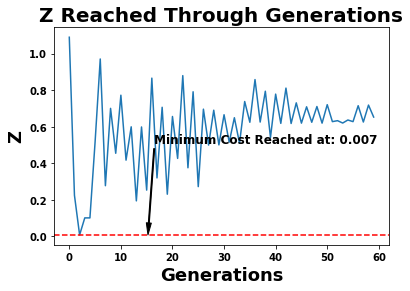



X After: 0.9479916982053469
Y After: 0.9052618727872055
OF After: 0.007026102139009082


In [60]:

#    Parameters : 
# 1   p_c = 1 # probability of crossover (always crossover)
# 2  p_m = 0.2 # probability of mutation
#    K = 3     
# 3   pop = 160  #population size
# 4  gen = 60   #number of generations 
# Calculate fitness value

##Rosen lambda function 
f=lambda x0,y0:100*(y0-x0**2)**2+(1-x0)**2

genetic(1, 0.2,160,60,3,f)





In [168]:
hide_toggle(for_next=True)

In [61]:
from IPython.display import HTML
def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'show/hide code'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)


### Egcrate function 

<h5>Let's start with a simple Simulated anealing code , and try to find the egcrate fucntion optimumum </h5>

In [400]:
hide_toggle(for_next=True)

Initial X is 2.000
Initial Y is 1.000
Initial Z is 43.372
X is -0.000
Y is 3.022
Final OF is 9.488


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in double_scalars


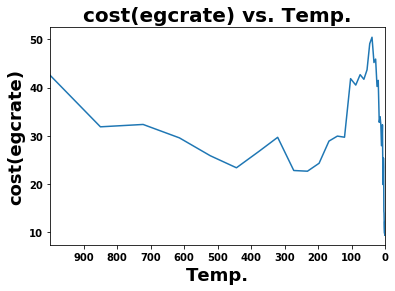

In [398]:


x0 = 2 # Initial solution we want to start at
y0 = 1

k = 0.1
T0 = 1000 
M = 300
N = 15
alpha = 0.85

z_int = x0**2+y0**2+25*(math.sin(x0)**2+math.sin(y0)**2)

print("Initial X is %.3f" % x0)
print("Initial Y is %.3f" % y0)
print("Initial Z is %.3f" % z_int)


temp = []
min_z = []

for i in range(M):
    for j in range(N):
        xt = 0
        yt = 0
        
        ran_x_1 = np.random.rand()
        ran_x_2 = np.random.rand()
        ran_y_1 = np.random.rand()
        ran_y_2 = np.random.rand()
        
        if ran_x_1 >= 0.5:
            x1 = k*ran_x_2
        else:
            x1 = -k*ran_x_2
        
        if ran_y_1 >= 0.5:
            y1 = k*ran_y_2
        else:
            y1 = -k*ran_y_2
            
        xt = x0+x1
        yt = y0+y1
        
        of_new = xt**2+yt**2+25*(math.sin(xt)**2+math.sin(yt)**2)
        
        of_current = x0**2+y0**2+25*(math.sin(x0)**2+math.sin(y0)**2)
        
        
        ran_1 = np.random.rand()
        form = 1/(np.exp((of_new-of_current)/T0))
        
        if of_new <= of_current:
            x0 = xt
            y0 = yt
        elif ran_1<=form:
            x0 = xt
            y0 = yt
        else:
            x0 = x0
            y0 = y0
        
    temp = np.append(temp,T0)
    min_z = np.append(min_z,of_current)
    T0 = alpha*T0


print("X is %.3f" % x0)
print("Y is %.3f" % y0)
print("Final OF is %.3f" % of_current)


plt.plot(temp,min_z)
plt.title("cost(egcrate) vs. Temp.",fontsize=20, fontweight='bold')
plt.xlabel("Temp.",fontsize=18, fontweight='bold')
plt.ylabel("cost(egcrate)",fontsize=18, fontweight='bold')

plt.xlim(1000,0)
plt.xticks(np.arange(min(temp),max(temp),100),fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()


### The egcrate function global minimum can be catched more oftenly using S.A than gradient based methods however the run time is higher using stochastic methods and though the cpu pressure is higher ( operations / cycle) 